In [1]:
# Tips to run the code: 
# Simply open Jupyter notebook and run the code

In [2]:
#Importing all the necessary libraries 


# pandas: Used for data manipulation and analysis
# matplotlib.pyplot: Provides  plotting interface for  visualizations.
# numpy: Python library with a collection of  mathematical functions for arrays and matrices.
# seaborn: Provides high-level interface for informative statistical graphics.
# sklearn.model_selection.train_test_split: Used to split datasets into training and testing sets for model evaluation and validation.
# sklearn.preprocessing.MinMaxScaler: Used for feature scaling by scaling and centering data between 0 and 1.
# sklearn.linear_model.LinearRegression: Models the relationship between a dependent variable and one or more independent variables using a linear method.
# sklearn.metrics.mean_squared_error: Computes the mean squared error between actual and predicted values.
# sklearn.metrics.r2_score: Computes the R-squared regression score.
# sklearn.preprocessing.PolynomialFeatures: Generates polynomial and interaction features for linear regression models.
# sklearn.pipeline.make_pipeline: Simplifies the workflow by building a pipeline from a series of transforms 
# sklearn.preprocessing.StandardScaler: Used for feature scaling that has mean of 0 and a standard deviation of 1.
# sklearn.preprocessing.PowerTransformer: Used for feature scaling by scaling and centering data to make it more Gaussian-like.
# sklearn.model_selection.RandomizedSearchCV
# sklearn.linear_model.Ridge
# sklearn.model_selection.GridSearchCV


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV


In [4]:
#Importing the data set from the csv file.

data = pd.read_csv('train.csv', delimiter=',')
data.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


# Data Exploration

In [5]:
# Checking the shape of the dataset to find number of rows and columns.
# Summary:
#        2071 rows
#        24 columns

data.shape

(2071, 24)

In [6]:
# Listing all the details about the data dataframe for null check and the type of data.
# Summary : 
#         There is no null values in the Dataset. 
#         The dataset mostly containd integer or float values.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2071 non-null   int64  
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2071 non-null   float64
 10  PercentageExpenditure         2071 non-null   float64
 11  Measles                       2071 non-null   int64  
 12  BMI                           2071 non-null   float64
 13  Und

In [7]:
# Describing the dataset to check the min and max range , check count, mean, standard deviation etc.
# Summary : 
#         The value count for each column is same i.e. 2071 hence no null values.
#         The columns in the dataset are spread across different scales(From: std,min and max parameters)
#           hence normalization is needed. 

data.describe(include='all')

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


In [8]:
# Display all the column names

print(data.columns)

Index(['ID', 'TARGET_LifeExpectancy', 'Country', 'Year', 'Status',
       'AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female', 'SLS',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'Under5LS',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')


# Exploratory Data Analysis

In [9]:
# Check duplicates in data
# Summary : Since the dataset contains mostly numerical and float data thus there is no duplicates 

data.duplicated().any()

False

In [10]:
# The utility method to remove all the white space in the code.
# Summary : Just removing incase ther's any. 

def remove_whitespaces(column):           
    if isinstance(column, str):
        return column.strip()
    else:
        return column
    
data.applymap(remove_whitespaces).head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [11]:
# Checking the null values
# Summary : The dataset dosenot have any null or missing values.

data.isnull().sum()

ID                              0
TARGET_LifeExpectancy           0
Country                         0
Year                            0
Status                          0
AdultMortality                  0
AdultMortality-Male             0
AdultMortality-Female           0
SLS                             0
Alcohol                         0
PercentageExpenditure           0
Measles                         0
BMI                             0
Under5LS                        0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV-AIDS                        0
GDP                             0
Population                      0
Thinness1-19years               0
Thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

In [12]:
# Checking the top 10 Country in the DataFrame.
# Summary : The first top 10 countries in the dataset has the same count i.e. 16.

top_country_index = data['Country'].value_counts().head(10)
top_country_index

Country
146    16
124    16
178    16
132    16
88     16
140    16
169    16
175    16
160    16
114    16
Name: count, dtype: int64

# Visual Exploration

In [13]:
# Examining attributes/features of the data set and target attribute.

In [14]:
# Checking the data based on Developed and Developing Countries
# Summary : 
#         The dataset is biased.
#         More than 1/3 of the data(81.5%) belongs to one category of the status i.e. Developing and 
#         only (18.5%) of the data belong to developing country.


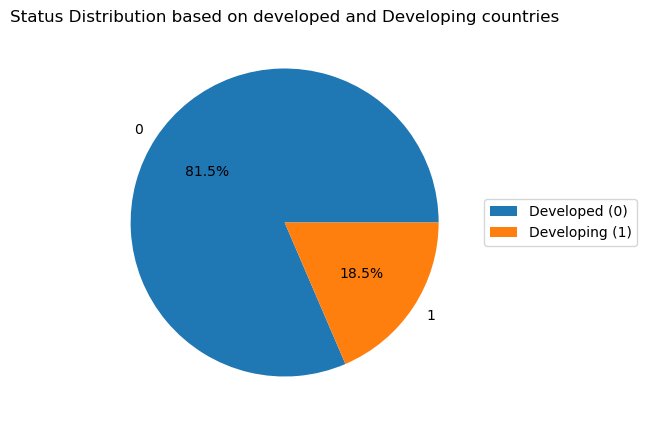

In [15]:
# Filtering the 'Status' column by checking the type of unique values.
status_type_counts = data['Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 5))
plt.pie(status_type_counts, labels=status_type_counts.index,  autopct='%1.1f%%')
plt.title('Status Distribution based on developed and Developing countries')
legend_label = ['Developed (0)', 'Developing (1)']
plt.legend(legend_label, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [16]:
# Using the histogram for all the columns to understand the range and skewness of the datset.

# Summary :
#        Most of the data is skewed.

#        Target Attribute - TARGET_LifeExpectancy is mostly distributed b/w 75 - 80 range with some extreme values.
#        Attribute - country and status are categorical data. 

#        Attributes that are "Positive Skewed " -
#         'AdultMortality', 'AdultMortality-Male','AdultMortality-Female', 'SLS','Alcohol', 
#         'PercentageExpenditure', 'Measles',  'Under5LS','TotalExpenditure', 'HIV-AIDS', 'GDP',
#         'Population','Thinness1-19years', 'Thinness5-9years',

#        Attributes that are "Negative Skewed " -
#         'TARGET_LifeExpectancy','Polio','Diphtheria','IncomeCompositionOfResources', 'Schooling'

# Attributes 'AdultMortality', 'AdultMortality-Male','AdultMortality-Female' - 
#                                                  the major distribution is in the range 0 - 300

# Attributes 'TotalExpenditure' - 
#                            Major distribution is in the range 3 - 7.5

# Attributes 'Schooling' - 
#                            Major distribution is in the range 3 - 4


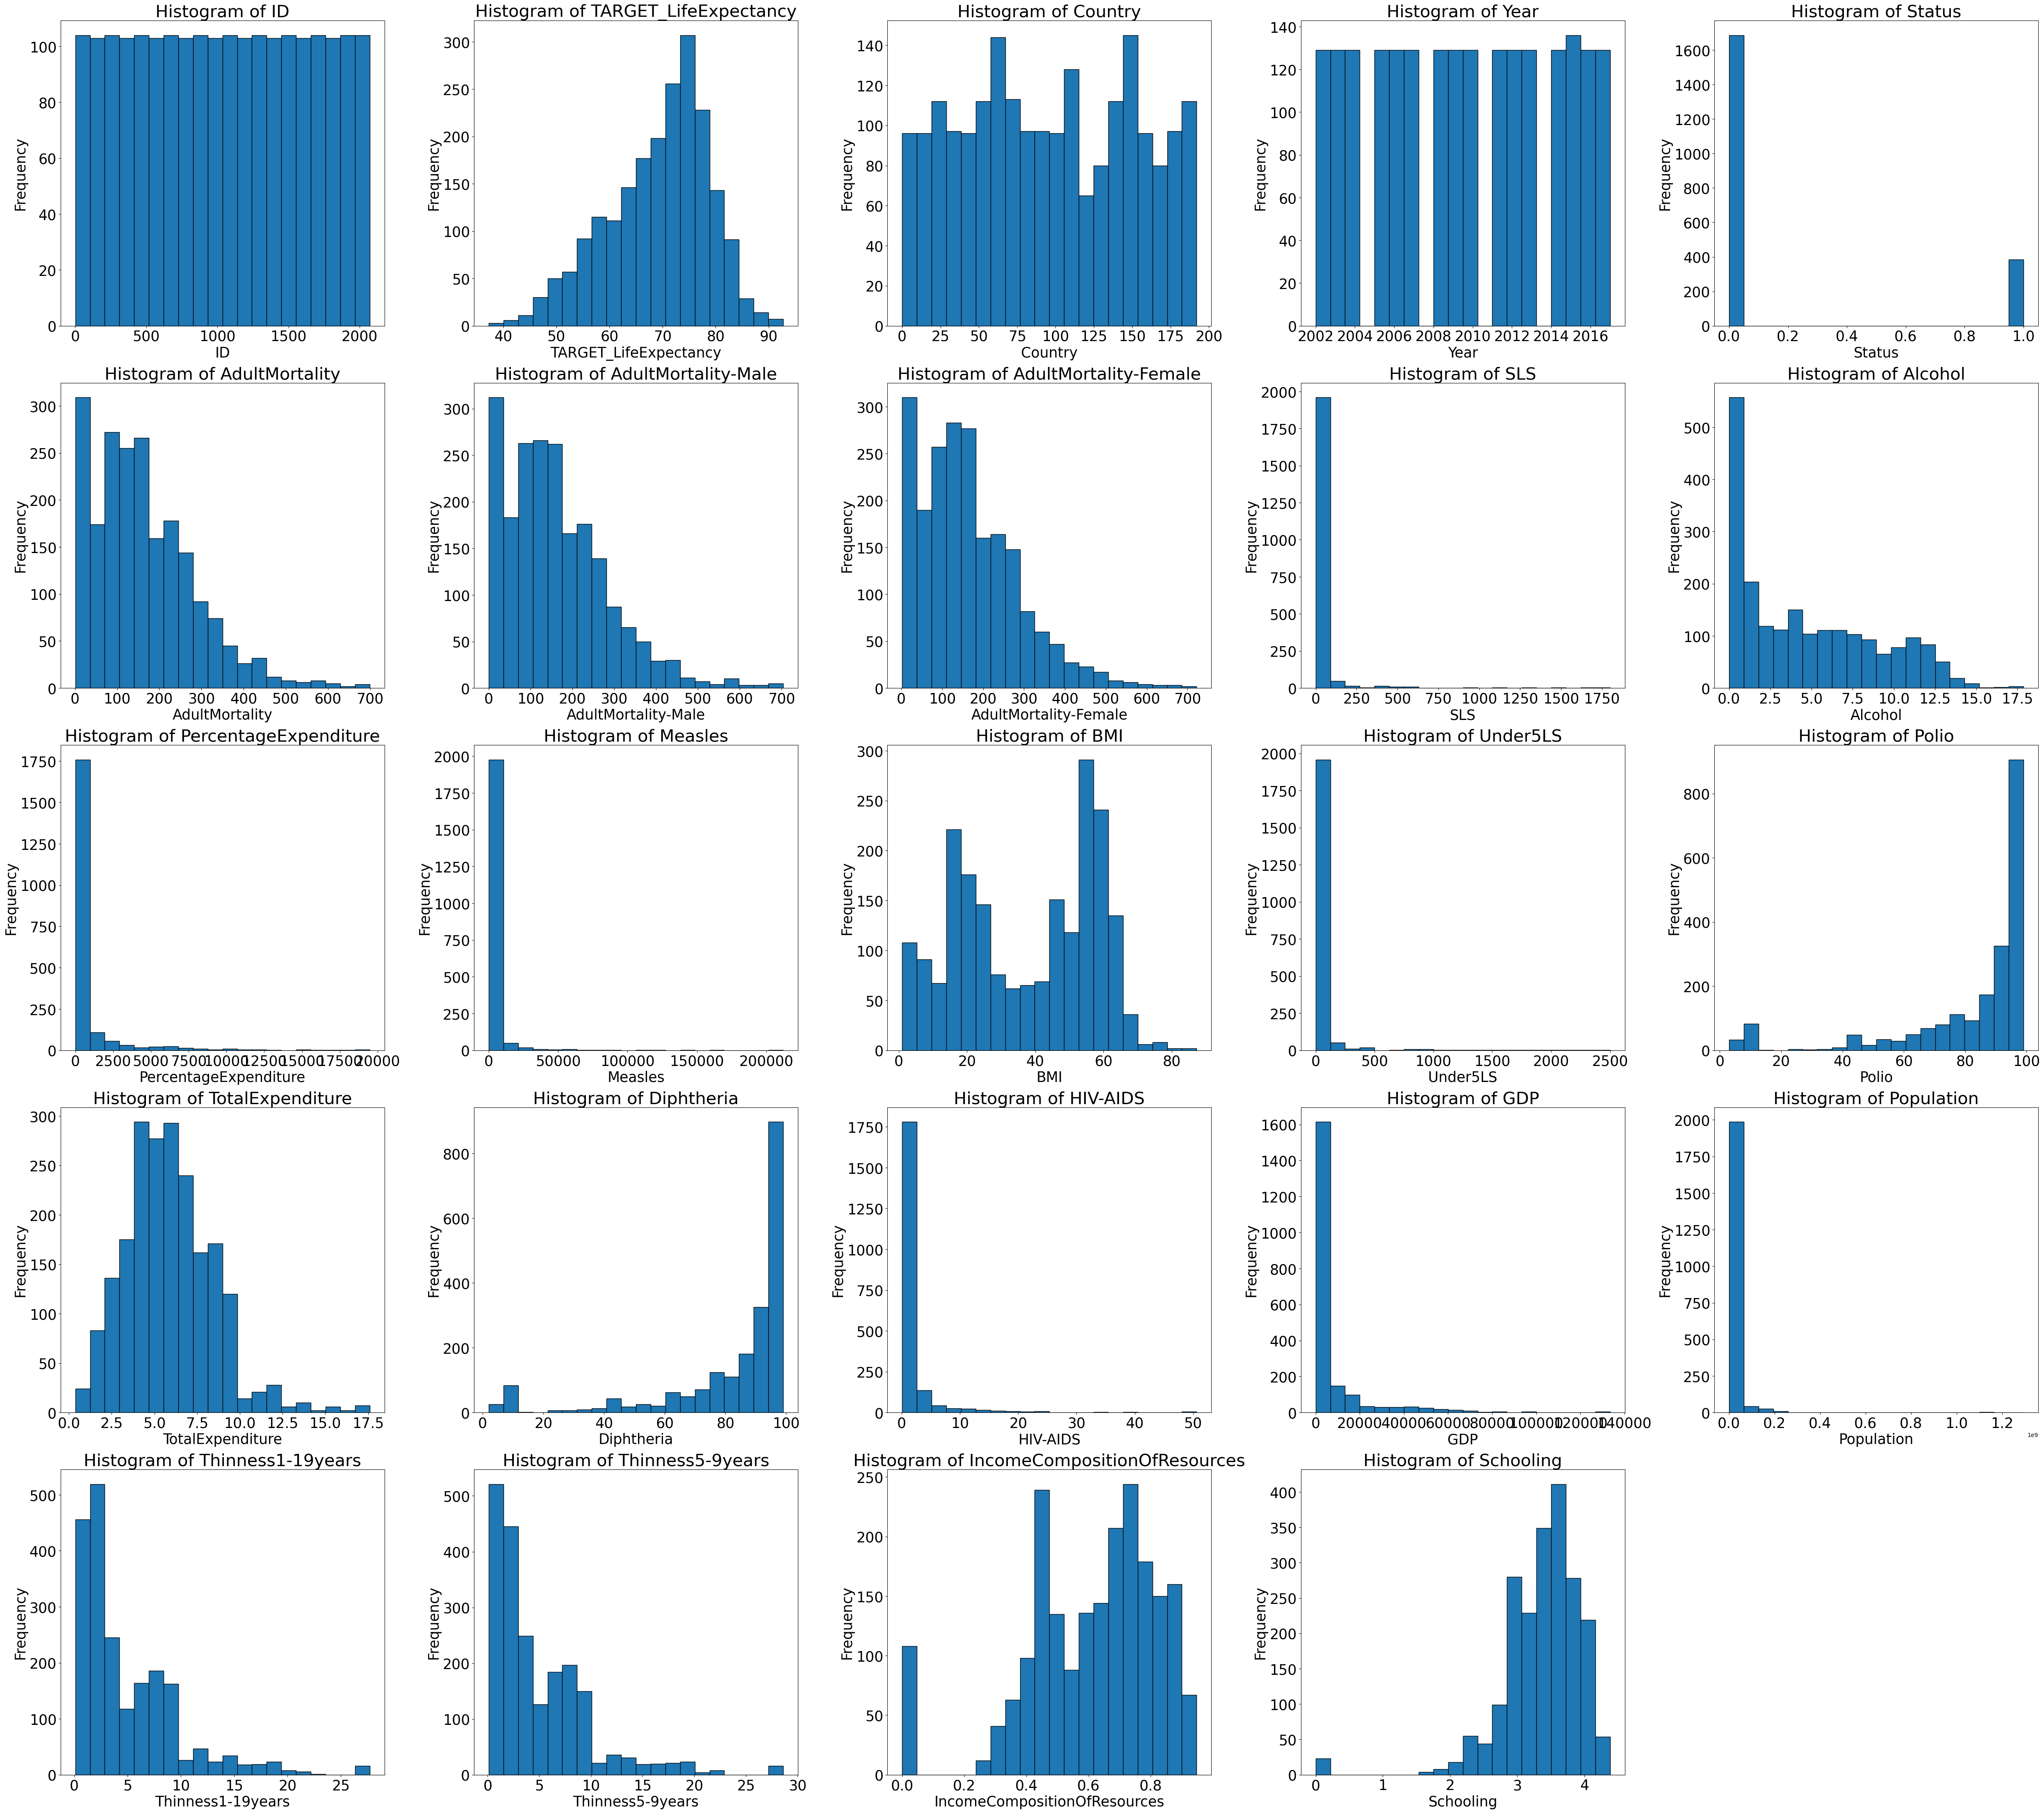

In [17]:
plt.figure(figsize=(50, 70))  

num_columns = len(data.columns)
num_rows = (num_columns + 2) // 3 

#Loop to display 3 figures in each row
for j, column in enumerate(data.columns):
    plt.subplot(num_rows, 5, j+1)  
    plt.hist(data[column], bins=20, edgecolor='k')
    plt.title(f'Histogram of {column}', fontsize=30)
    plt.xlabel(column, fontsize=25)
    plt.ylabel('Frequency', fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

plt.tight_layout()
plt.show()


In [18]:
# Using heatmap to understand the relationship  of target attribute with other features in the dataset.

# Summary :
#         Target attribute "TARGET_LifeExpectancy" has significant correlation  with the attributes -
#            'status','Alcohol','Polio','Diphtheria','HIV-AIDS','GDP','IncomeCompositionOfResources','Schooling'.

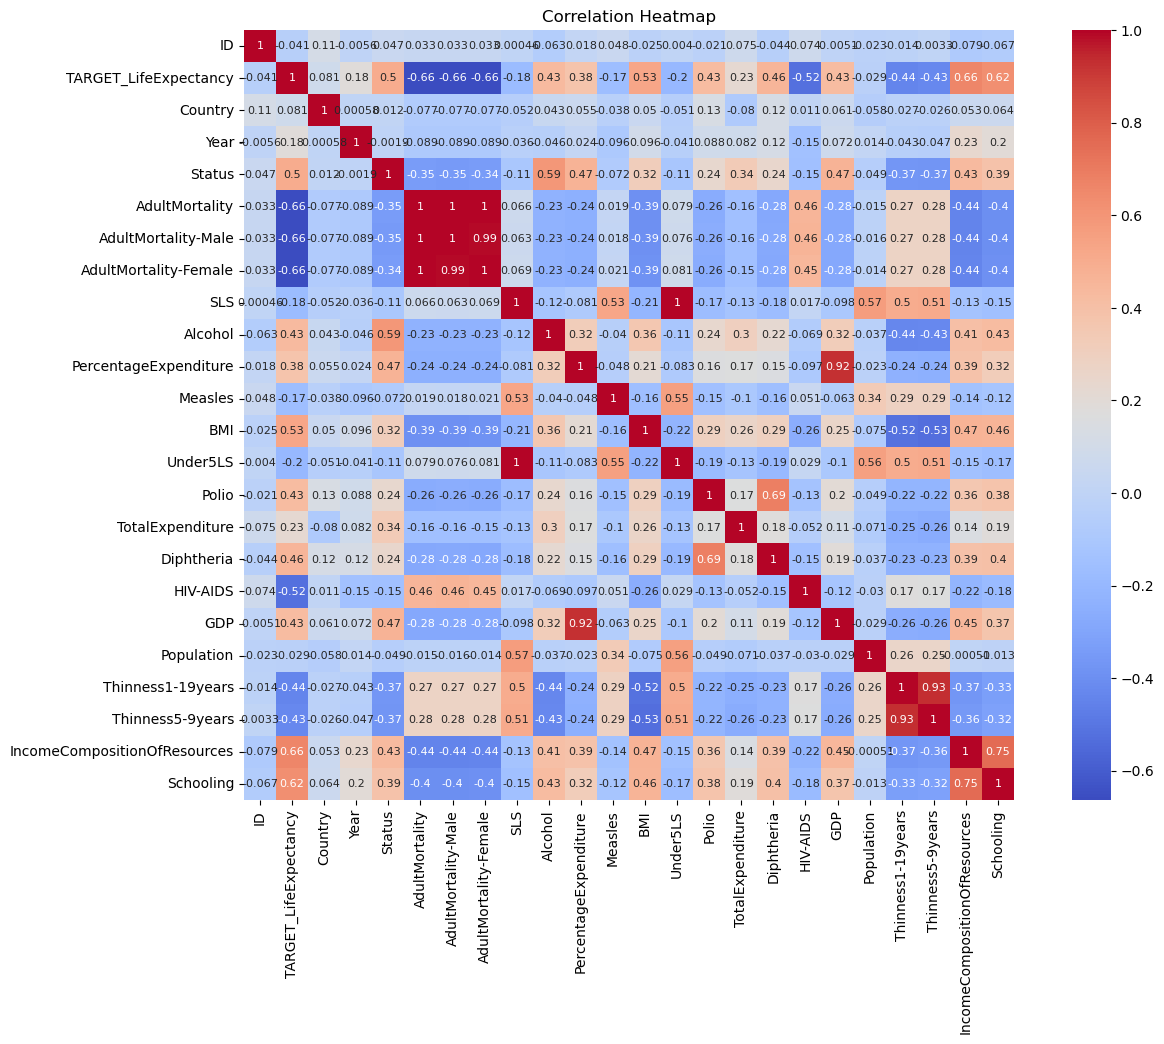

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), square=True, cmap='coolwarm', annot=True, annot_kws={'size': 8})
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Using Box Plot to analyze outliers in the dataset.

# Summary: There are a lot of outliers in the dataset 
#         The target attribute "TARGET_LifeExpectancy" median is 72 and has outliers after the range of 45.


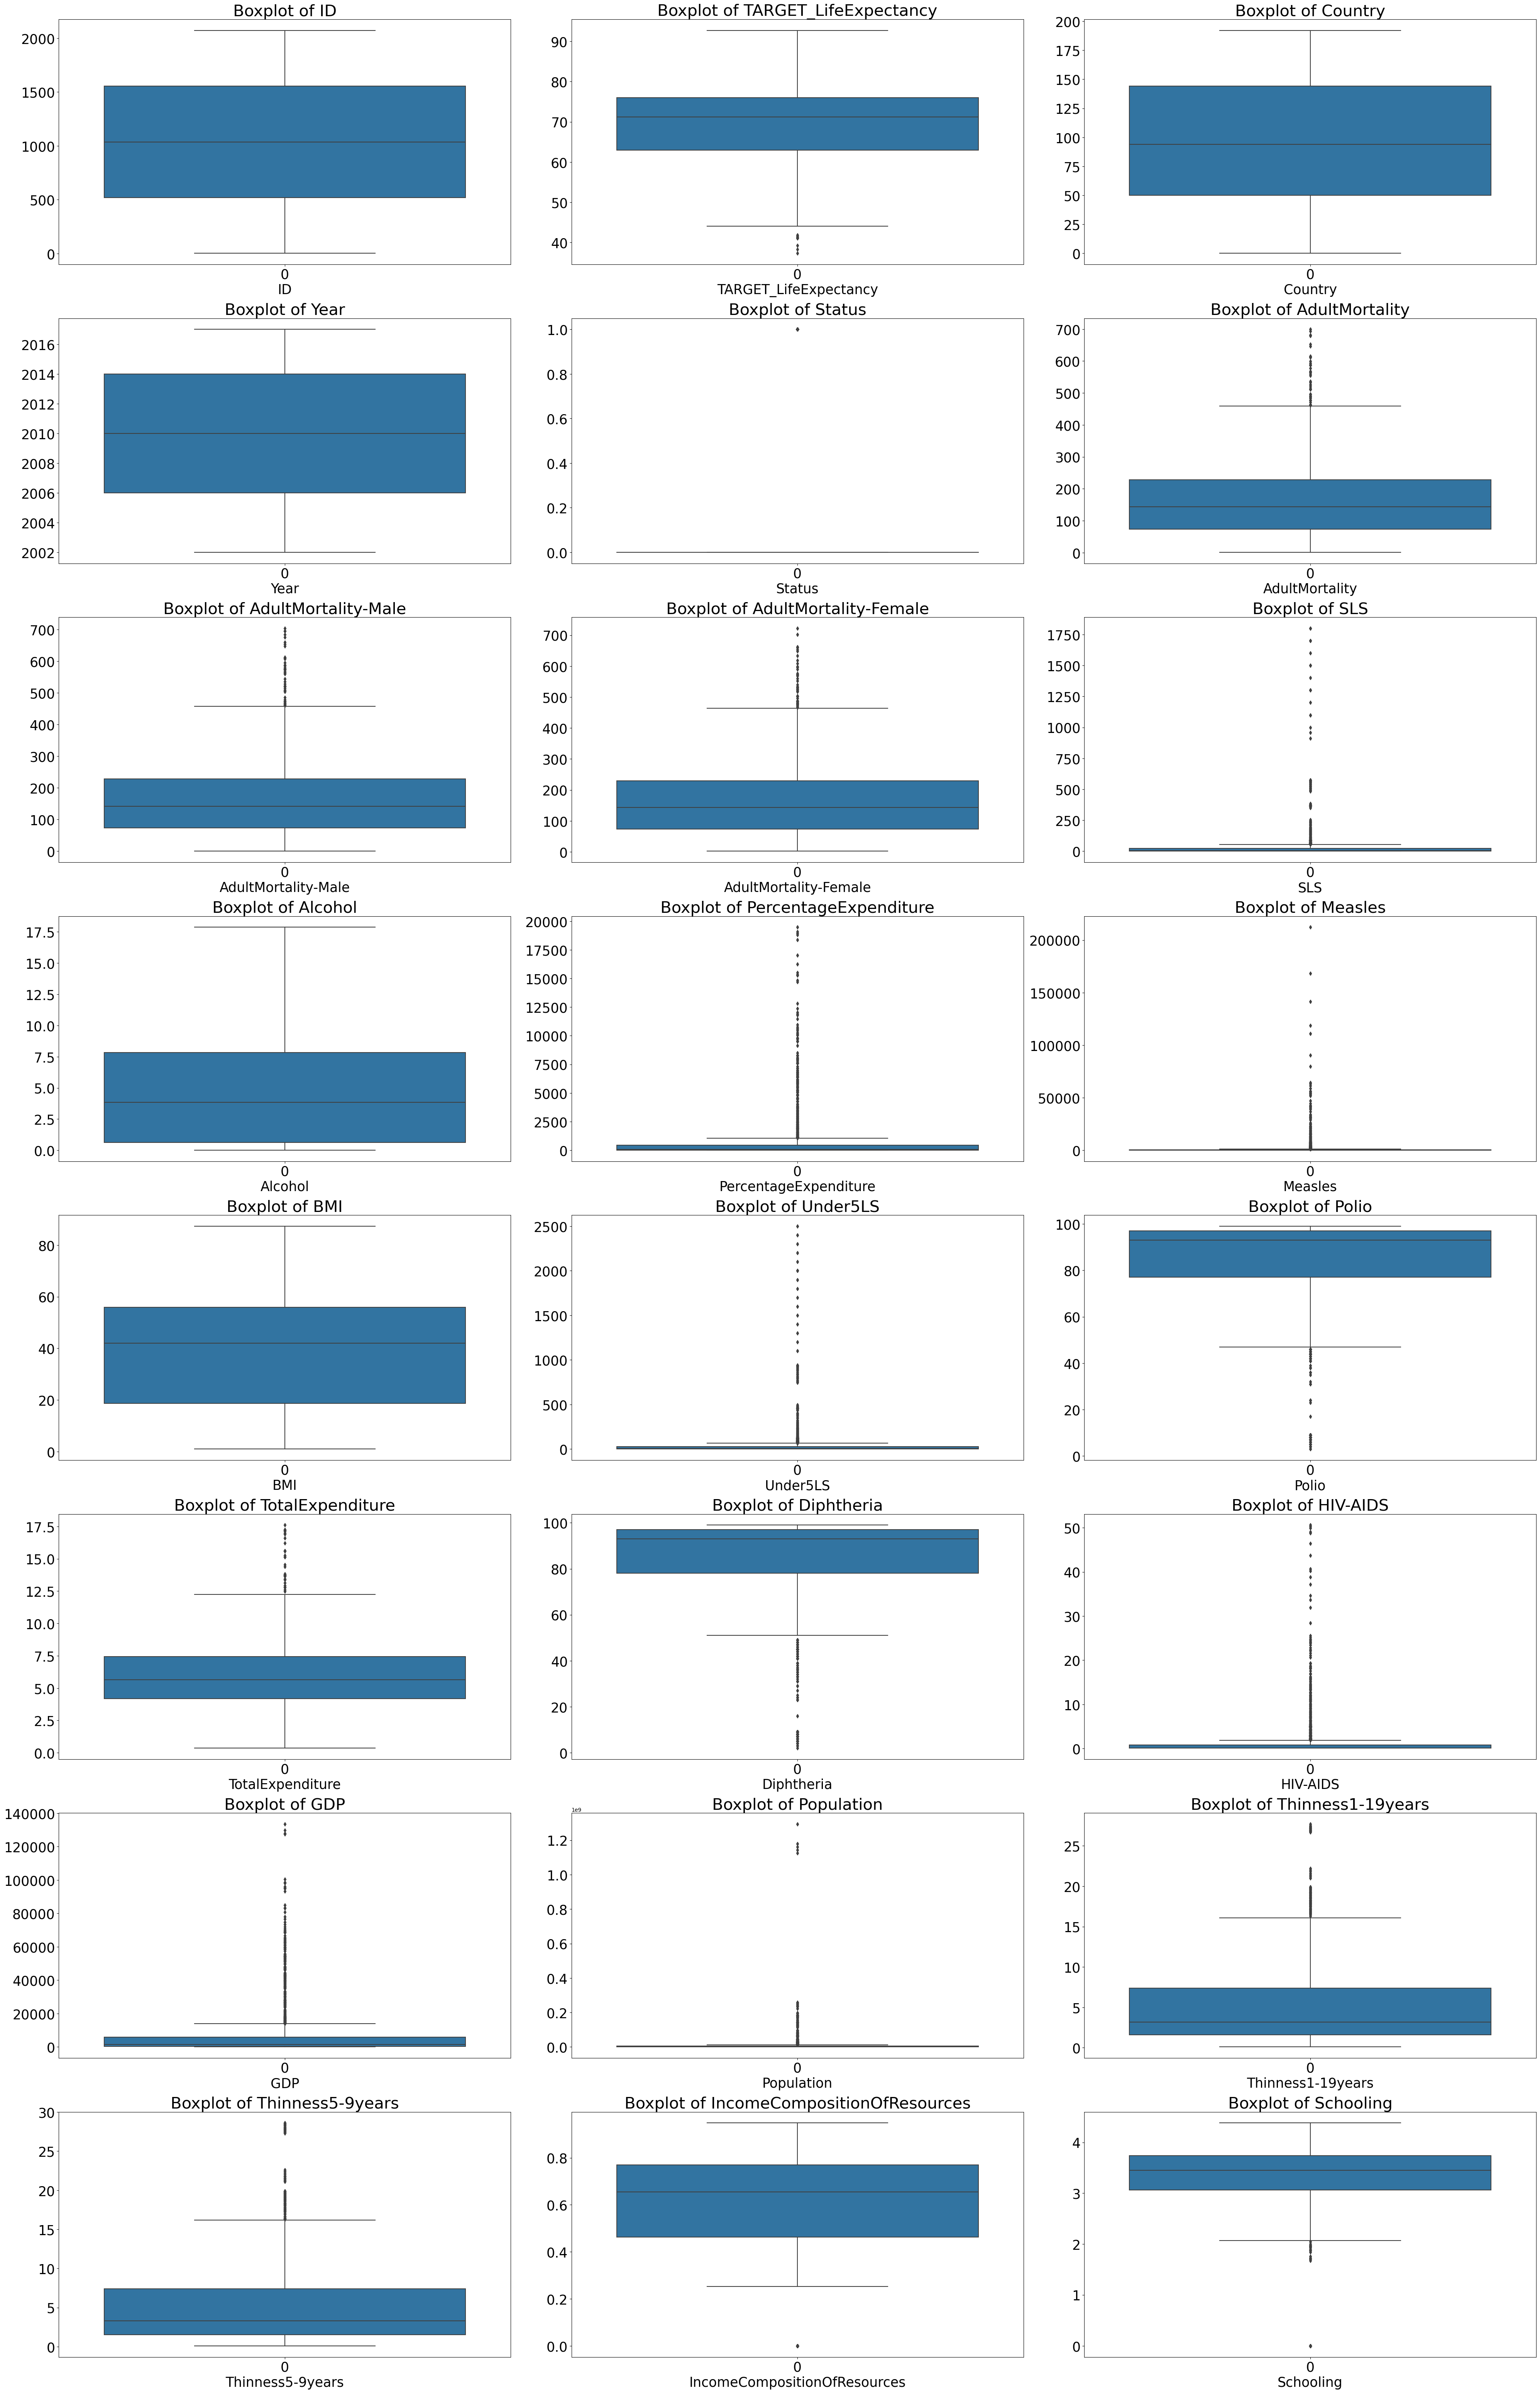

In [21]:
plt.figure(figsize=(40, 100))  

num_columns = len(data.columns)
num_rows = (num_columns + 2) // 2 

#Loop to display 3 figures in each row
for j, column in enumerate(data.columns):
    plt.subplot(num_rows, 3, j+1)  
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}', fontsize=30)
    plt.xlabel(column, fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

plt.tight_layout()
plt.show()

In [22]:
# Using Line plot to check the relationship between TARGET_LifeExpectancy and year
# Summary : There has been a rise in TARGET_LifeExpectancy with the increase in the year.
#           Year is directly proportion to TARGET_LifeExpectancy.

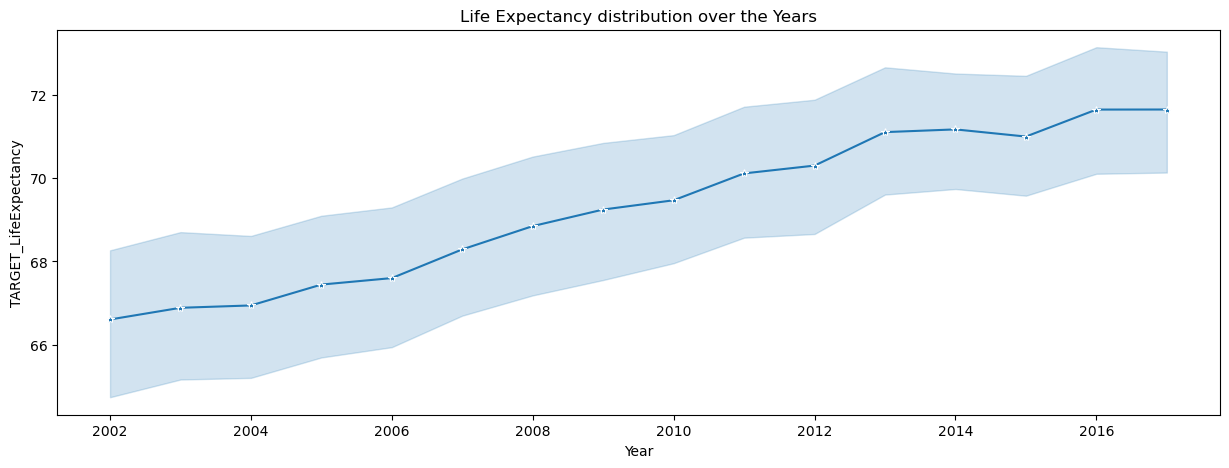

In [23]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='TARGET_LifeExpectancy', data=data, marker='*')
plt.xlabel('Year')
plt.ylabel('TARGET_LifeExpectancy')
plt.title('Life Expectancy distribution over the Years')
plt.show()

In [24]:
# Using Bar Chart to check the range of the developing countries.
# Summary: The top unique developing conutry counts are in the range of 75- 90 in the dataset.

Count of Developed Countries: 1687
Count of Developing Countries: 384


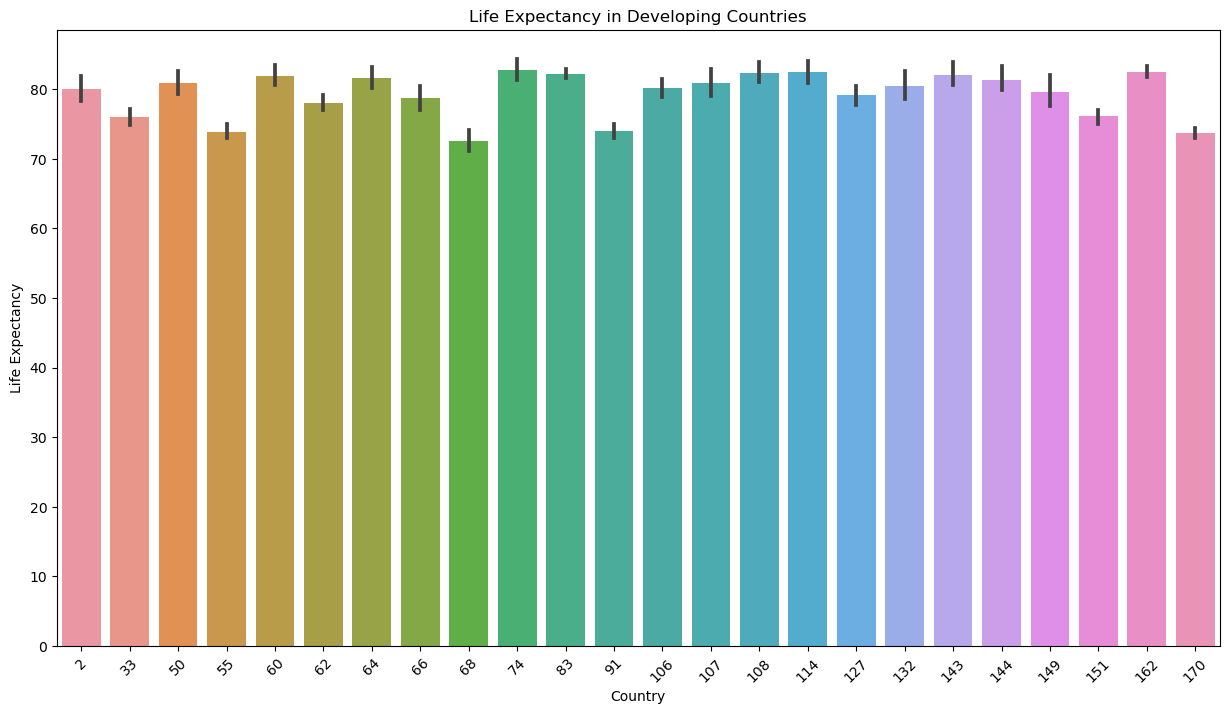

In [25]:
# Filter data for developed and developing countries
developed_countries_count = data['Status'].value_counts()[0]
print("Count of Developed Countries:", developed_countries_count)

developing_countries_count = data['Status'].value_counts()[1]
print("Count of Developing Countries:", developing_countries_count)

developing_countries_data = data[data['Status'] == 1]
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='TARGET_LifeExpectancy', data=developing_countries_data)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy in Developing Countries')
plt.xticks(rotation=45)
plt.show()



In [26]:
# #Dropping the Id column so that there is no data leakage 
# data.drop(columns=['ID'], inplace=True)
# data.head()

# Splitting the dataset (Train, Test and Validation)

In [27]:
# Using Train-validation-test split to do model evaluation.
# Dropping the target attribute frim the dataset and storing it in "y" variable.
# Keeping all the feature attributes in "X" variable except the target variable.

# Initially using 
# - X_train, y_train: Training set (80%)
# - X_validation, y_validation: Validation set (10%)
# - X_test, y_test: Test set (10%)

In [28]:
X = data.drop(columns=['TARGET_LifeExpectancy'])  
y = data['TARGET_LifeExpectancy'] 

In [29]:
# Splitting  data into 80% training & 20% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the temporary set into 50% validation & 50% test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [30]:
# Checking the size of dataset for Training set (80%), Validation set (10%) & Test set (10%)
print("Training datset size:", len(X_train))
print("Validation dataset size:", len(X_validation))
print("Test dataset size:", len(X_test))

Training datset size: 1656
Validation dataset size: 207
Test dataset size: 208


In [31]:
# # Splitting  data into 70% training & 30% temporary sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Splitting the temporary set into 50% validation & 50% test sets
# X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [32]:
# # Checking the size of dataset for Training set (70%), Validation set (15%) & Test set (15%)
# print("Training datset size:", len(X_train))
# print("Validation dataset size:", len(X_validation))
# print("Test dataset size:", len(X_test))

# Feature Scaling / Normalisation

In [33]:
# Using feature scaling to ensure that all features have the same scale to improve model performance. 

In [34]:
# Used Standard scaler to standardize the features with a mean of 0 and a standard deviation of 1.
# Summary : Even after using standard scaler the data remain skewed and not much improvement seen.

In [35]:
scaler = StandardScaler()
X_train_standard_scaled = scaler.fit_transform(X_train)
X_validation_standard_scaled = scaler.transform(X_validation)
X_test_standard_scaled = scaler.transform(X_test)

In [36]:
print("Standard Scaled X_train size:", X_train_standard_scaled.shape)
print("Standard Scaled X_validation size:",X_validation_standard_scaled.shape)
print("Standard Scaled X_test size:", X_test_standard_scaled.shape)

Standard Scaled X_train size: (1656, 23)
Standard Scaled X_validation size: (207, 23)
Standard Scaled X_test size: (208, 23)


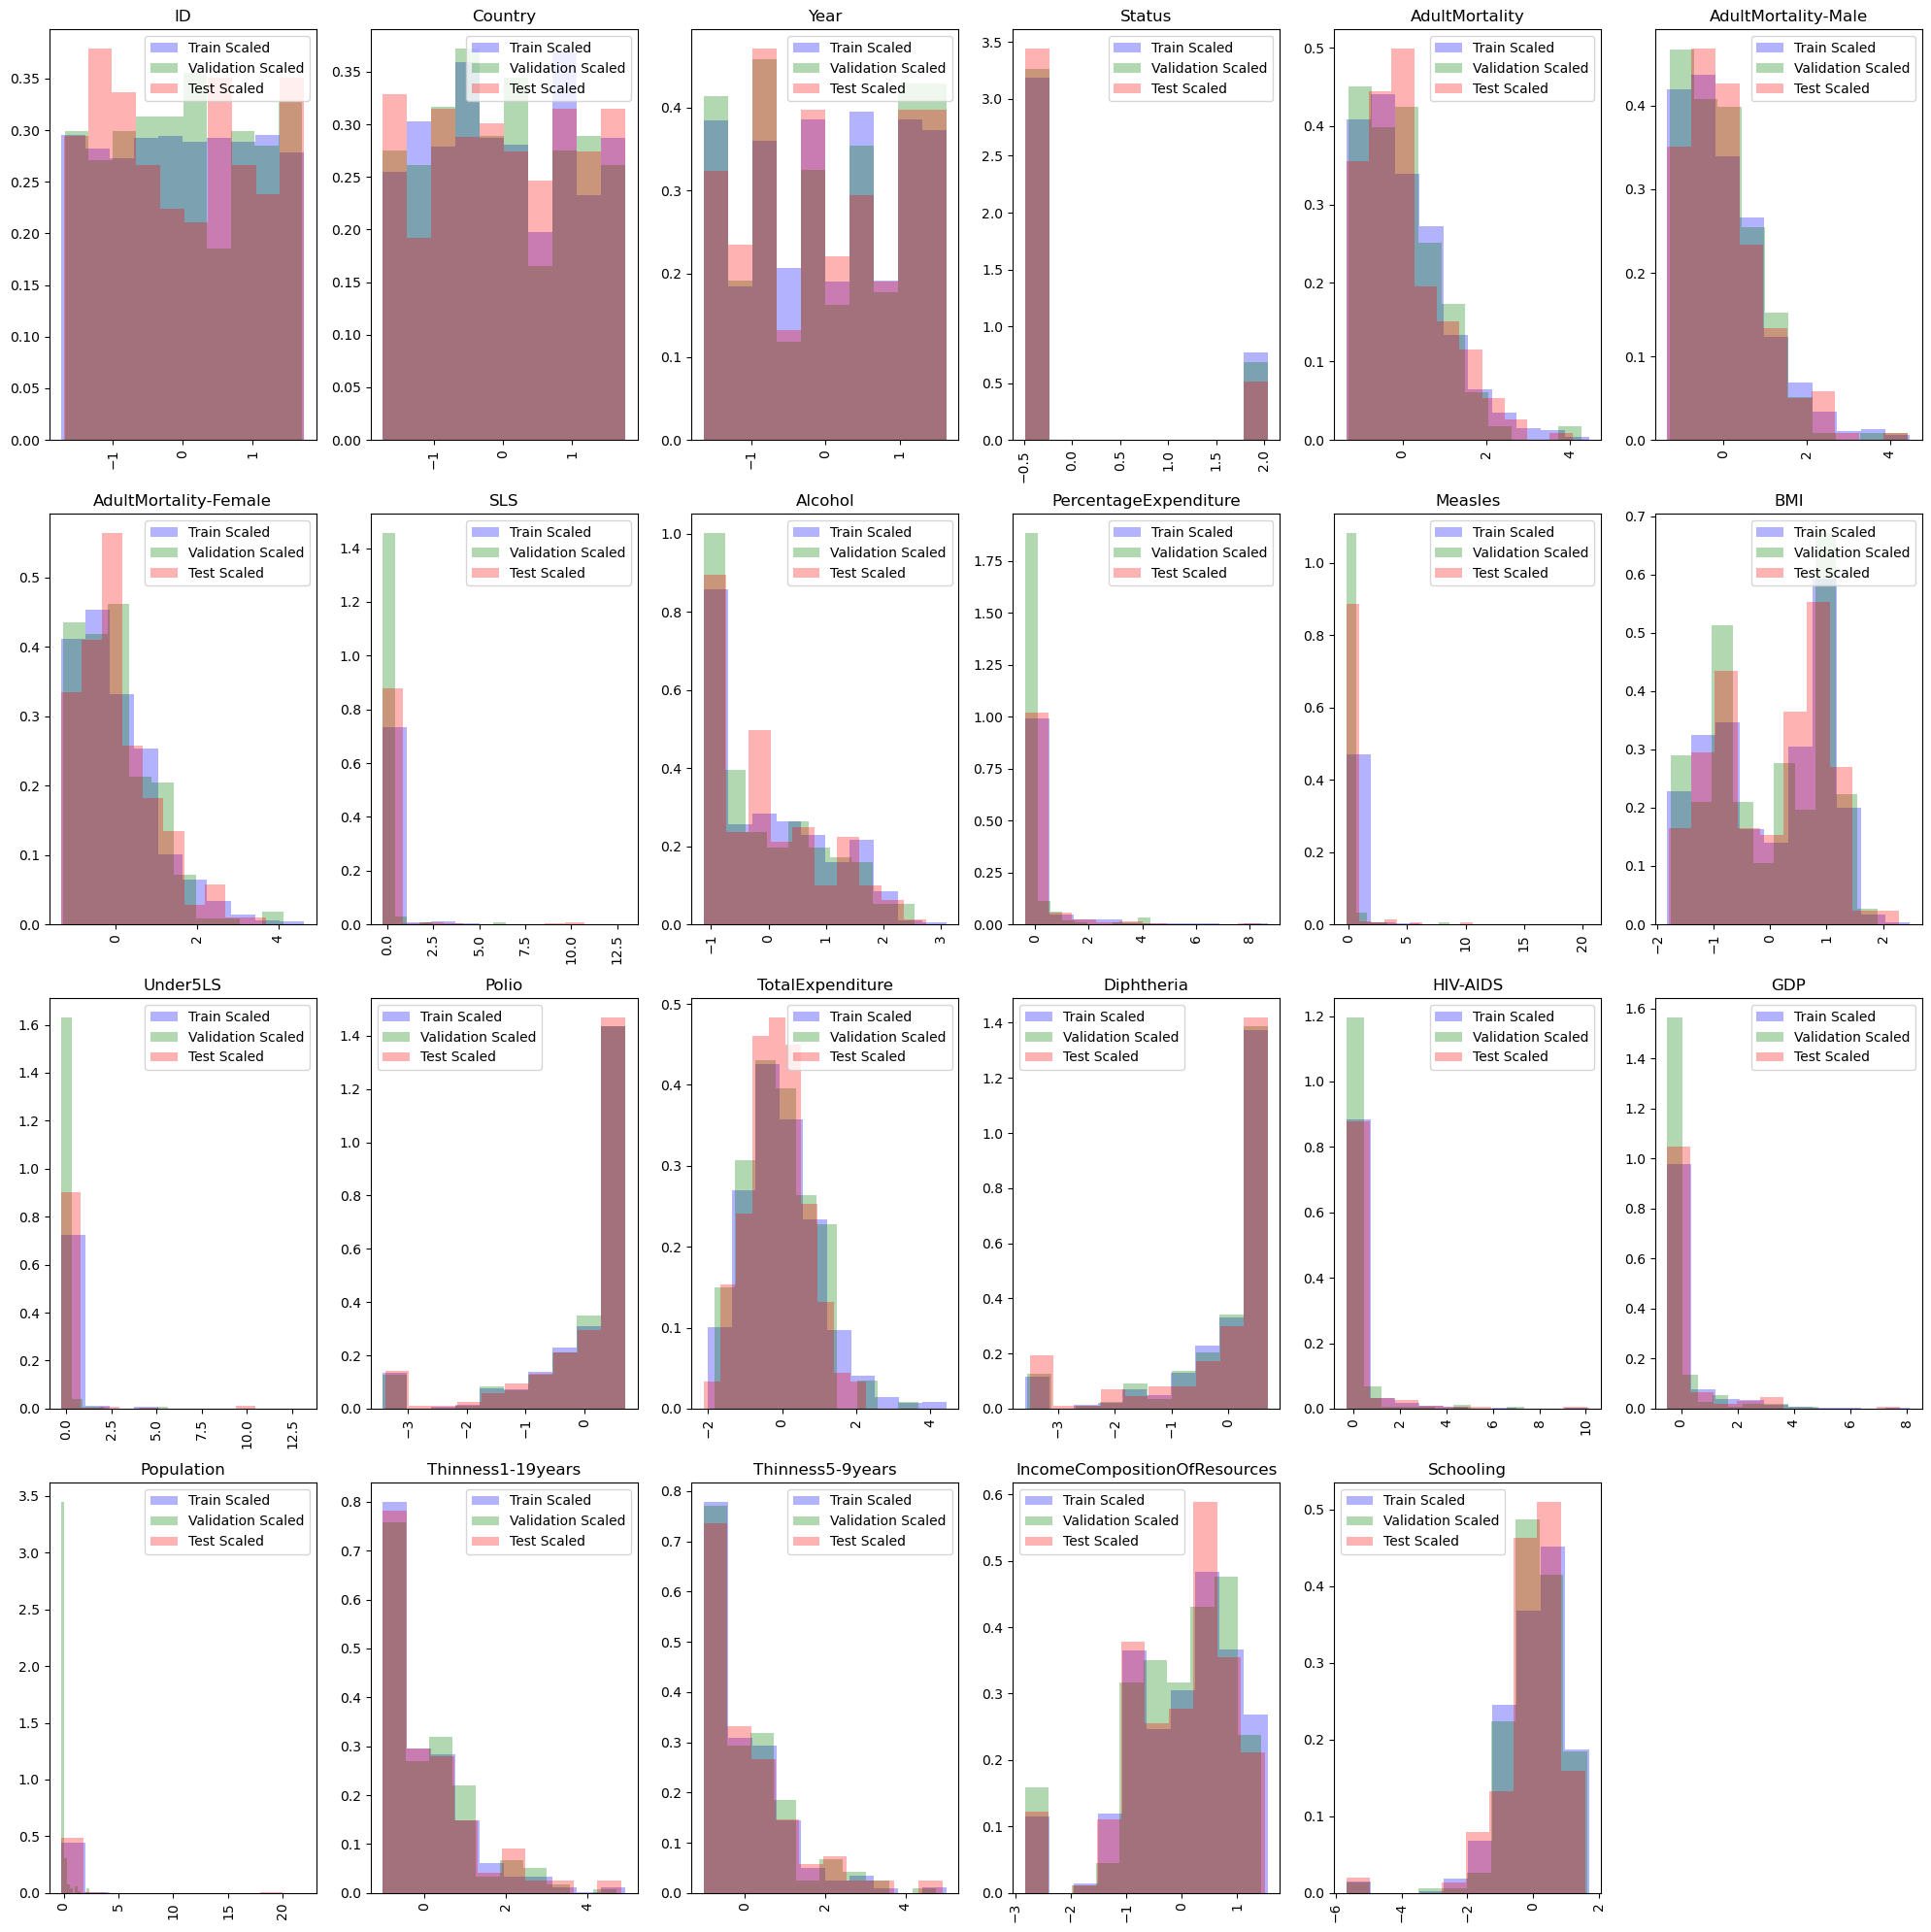

In [37]:
#Plotting the features to see if everthing is in order.
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train.columns):
    plt.subplot(4, 6, i + 1)  # Adjust the subplot grid as needed
    plt.hist(X_train_standard_scaled[:, i], alpha=0.3, color='b', density=True, label='Train Scaled')
    plt.hist(X_validation_standard_scaled[:, i], alpha=0.3, color='g', density=True, label='Validation Scaled')
    plt.hist(X_test_standard_scaled[:, i], alpha=0.3, color='r', density=True, label='Test Scaled')
    plt.title(col)
    plt.legend()
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


In [38]:
# Using MinMaxScaler to scales and transforms features to a range between 0 and 1, 
# This substracts the minimum value and then divide the range by (maximum - minimum). 

# Summary : Even after using MinMaxScaler the data remain skewed and not much improvement seen.

In [39]:
scaler = MinMaxScaler()
X_train_minmax_scaled = scaler.fit_transform(X_train)
X_validation_minmax_scaled = scaler.transform(X_validation)
X_test_minmax_scaled = scaler.transform(X_test)

In [40]:
print("MinMax Scaled X_train size:", X_train_minmax_scaled.shape)
print("MinMax Scaled X_validation size:",X_validation_minmax_scaled.shape)
print("MinMax Scaled X_test size:", X_test_minmax_scaled.shape)

MinMax Scaled X_train size: (1656, 23)
MinMax Scaled X_validation size: (207, 23)
MinMax Scaled X_test size: (208, 23)


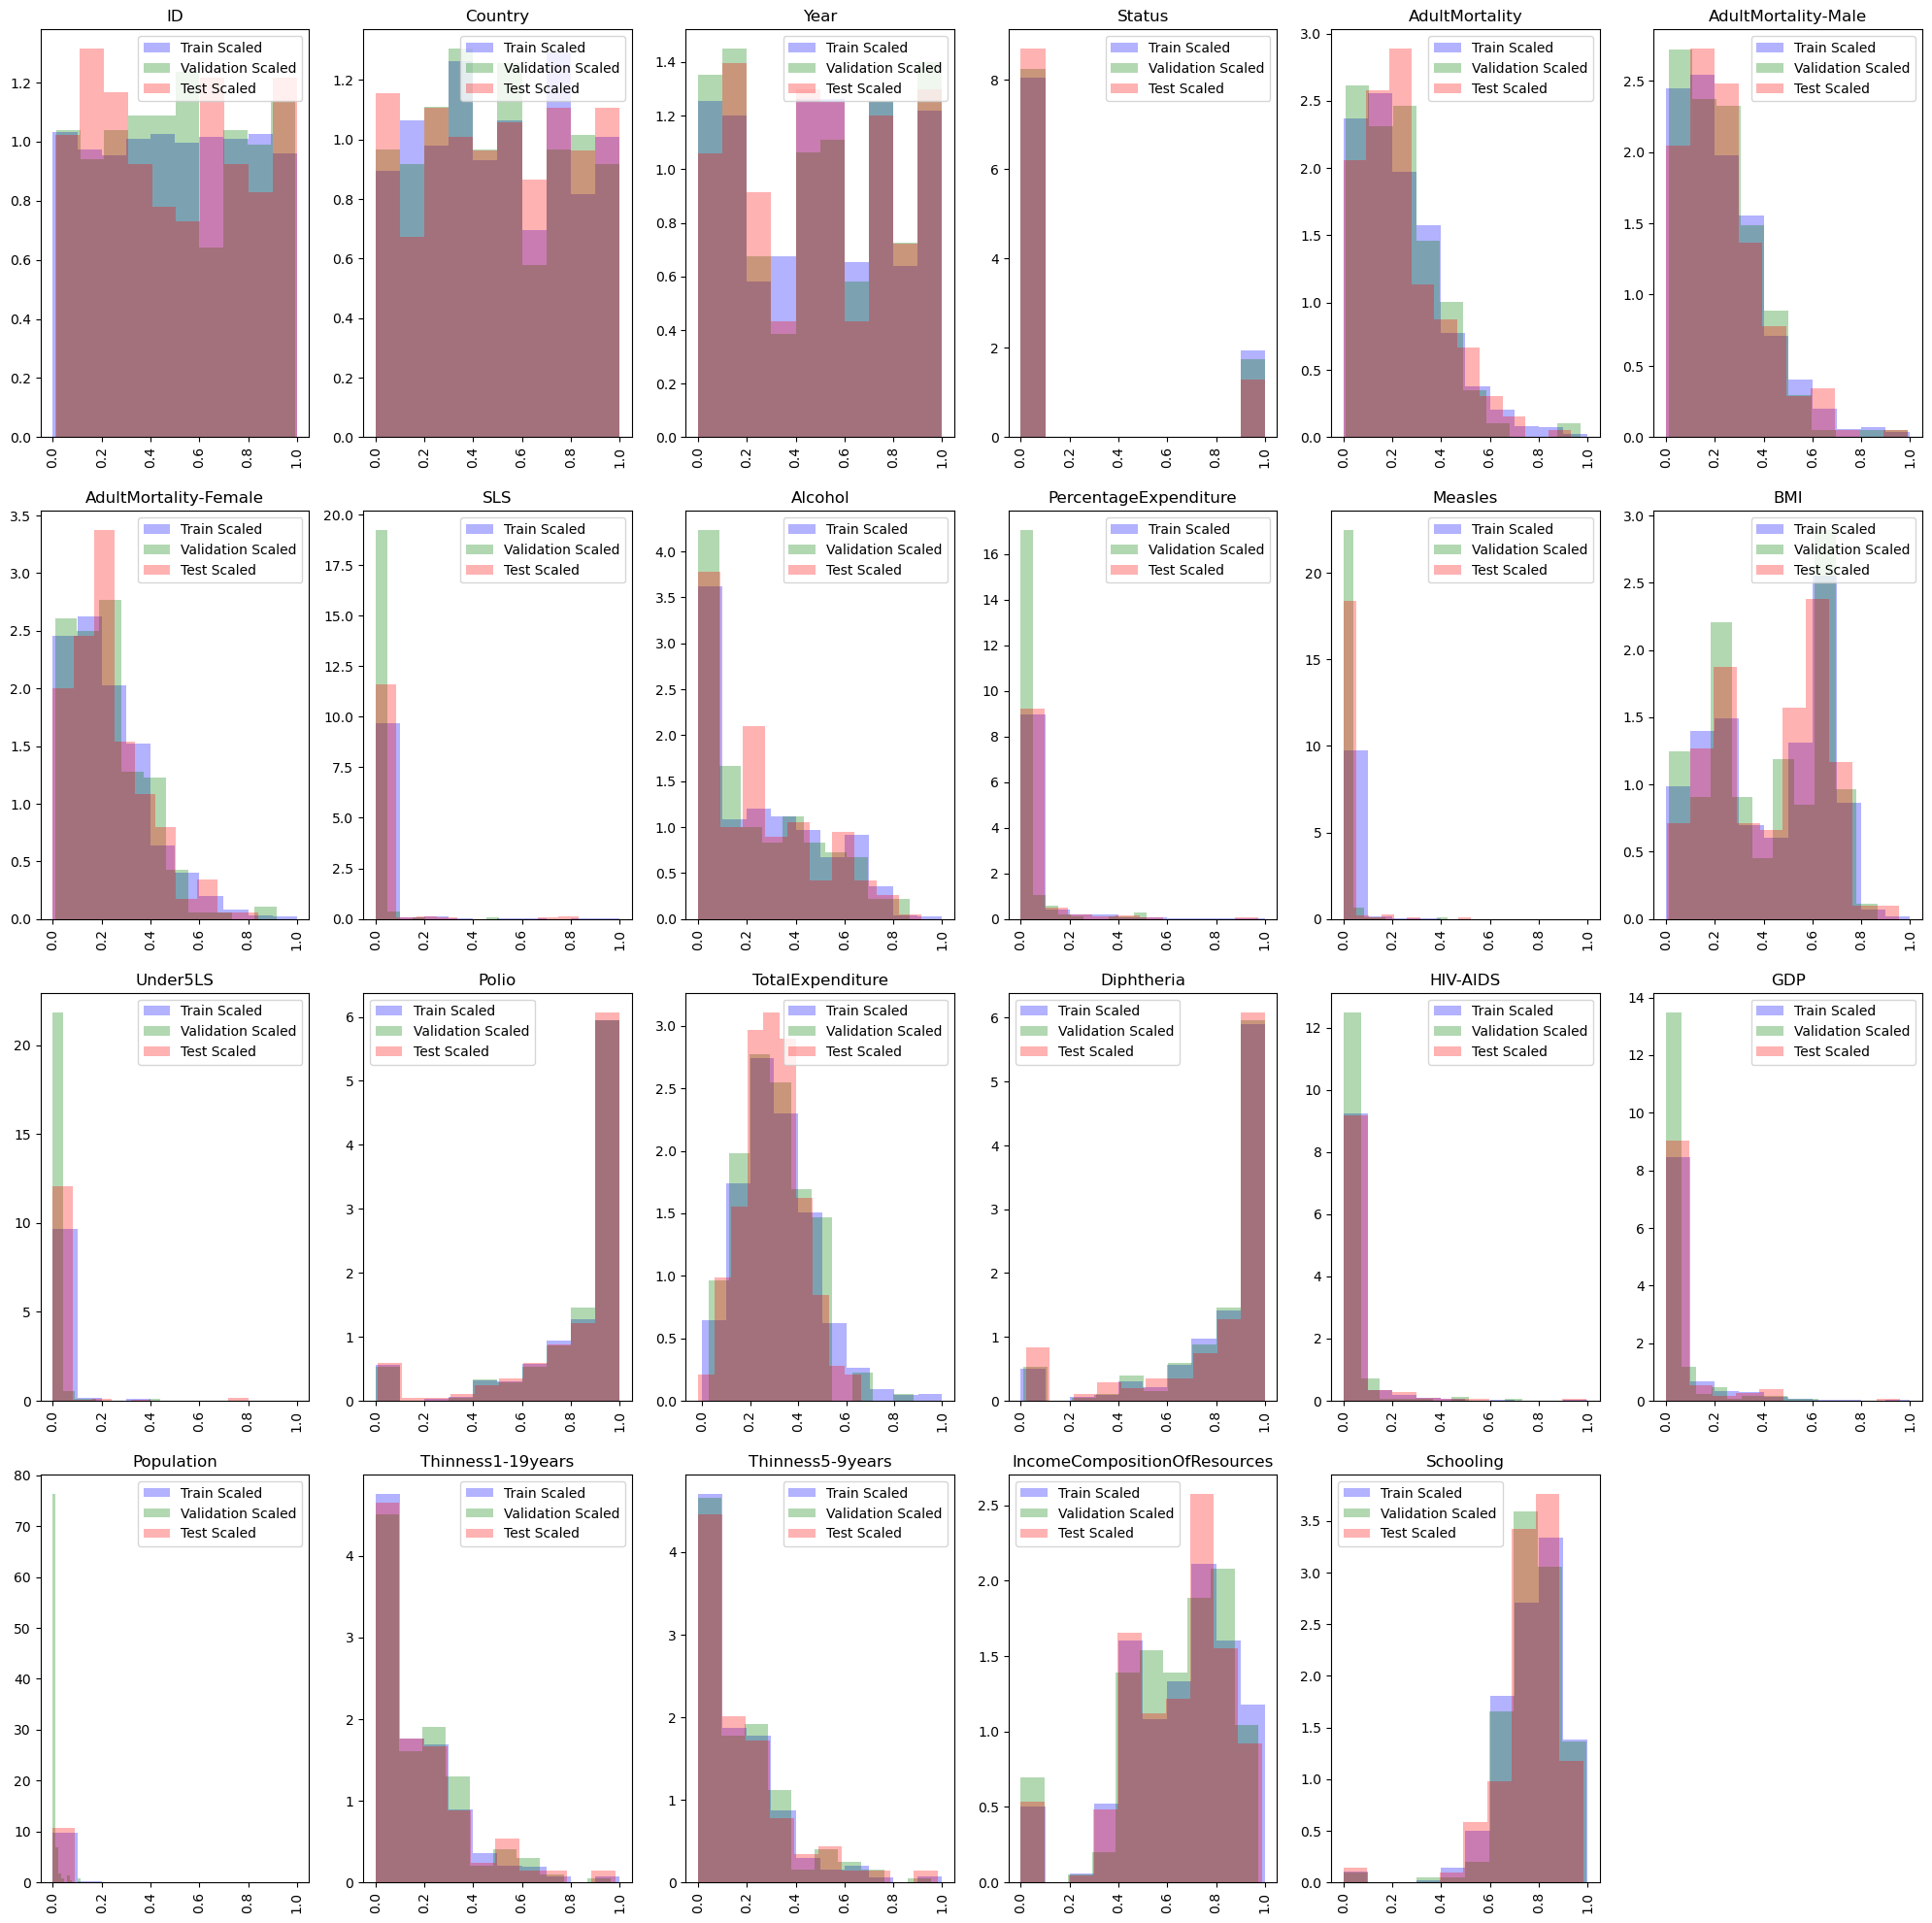

In [41]:
#Plotting features to see if everthing is in order.

plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train.columns):
    plt.subplot(4, 6, i + 1)
    plt.hist(X_train_minmax_scaled[:, i], alpha=0.3, color='b', density=True, label='Train Scaled')
    plt.hist(X_validation_minmax_scaled[:, i], alpha=0.3, color='g', density=True, label='Validation Scaled')
    plt.hist(X_test_minmax_scaled[:, i], alpha=0.3, color='r', density=True, label='Test Scaled')
    plt.title(col)
    plt.legend()
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


In [42]:
# Using PowerTransformer to make the data more Gaussian-like to both positively and negatively skewed data.
# Summary -  The data becomes less skewed.
#            The distribution become more symmetric.
#            The variances are stabilized.

In [43]:
pt = PowerTransformer()
X_train_power_transformed_scaled = pt.fit_transform(X_train)
X_validation_power_transformed_scaled = pt.transform(X_validation)
X_test_power_transformed_scaled = pt.transform(X_test)


In [44]:
print("PowerTransformer Scaled X_train size:", X_train_power_transformed_scaled.shape)
print("PowerTransformer Scaled X_validation size:",X_validation_power_transformed_scaled.shape)
print("PowerTransformer Scaled X_test size:", X_test_power_transformed_scaled.shape)

PowerTransformer Scaled X_train size: (1656, 23)
PowerTransformer Scaled X_validation size: (207, 23)
PowerTransformer Scaled X_test size: (208, 23)


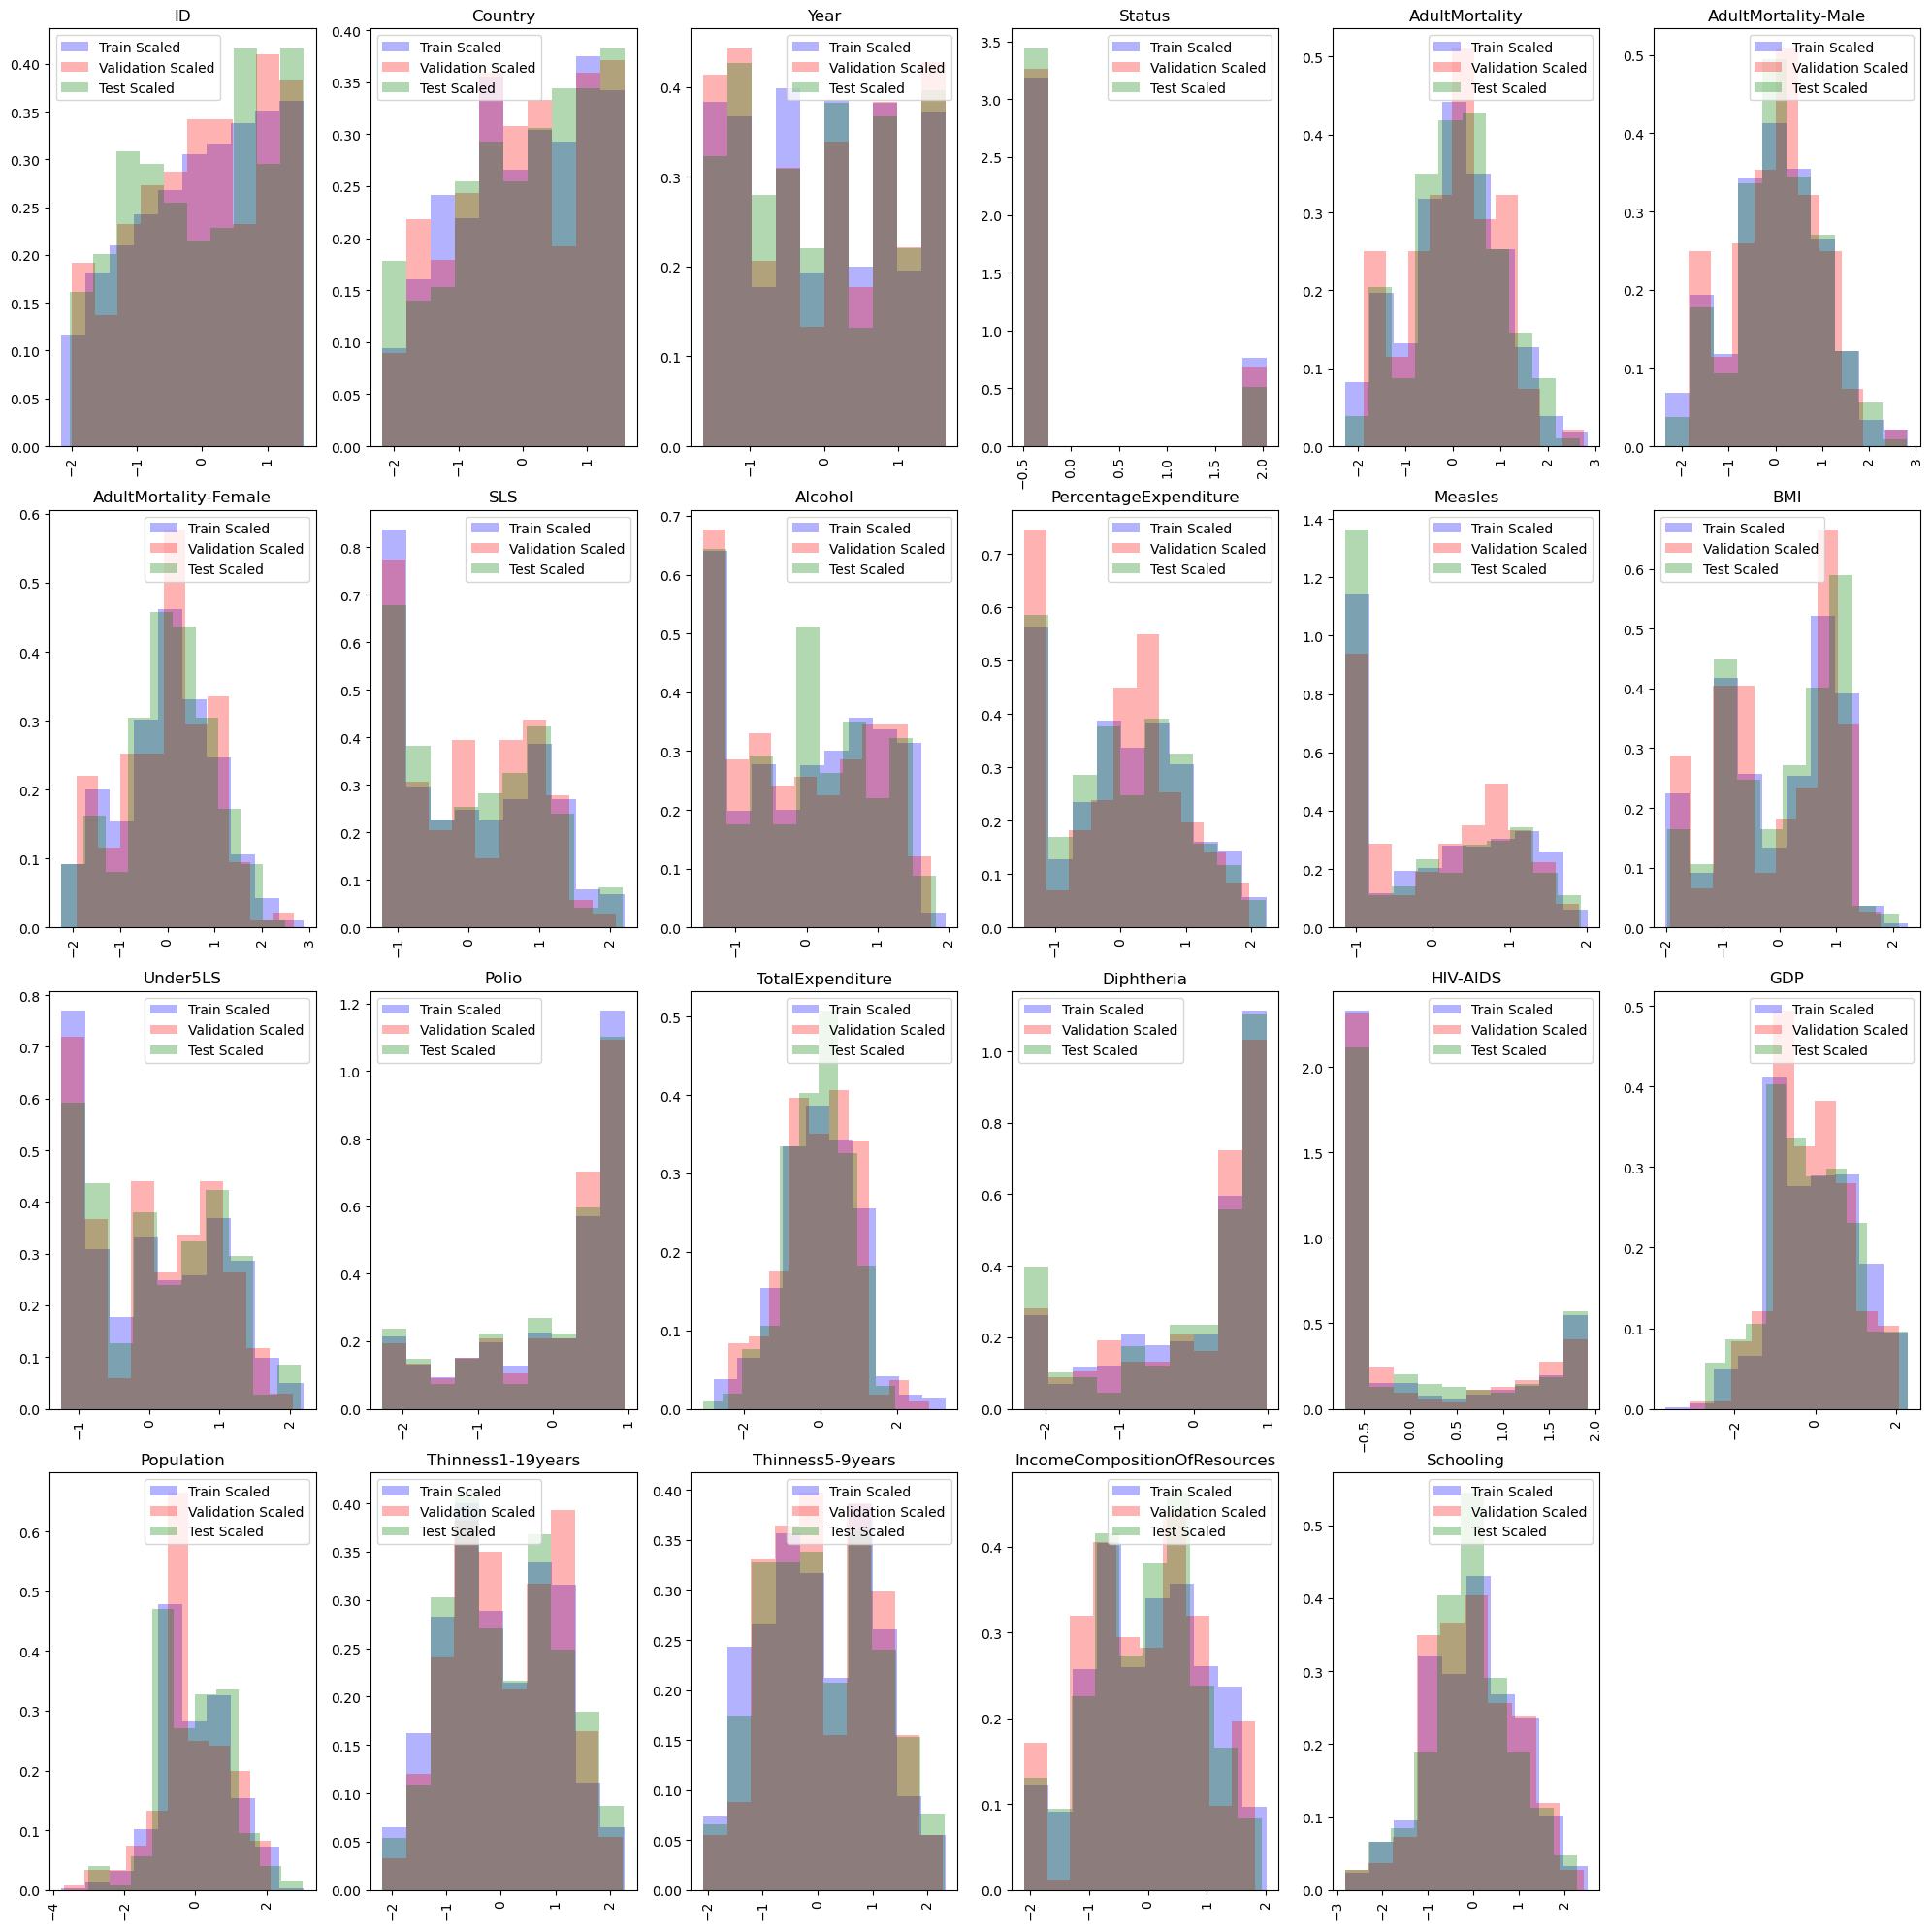

In [45]:
#Plotting the features to see if everthing is in order.

plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train.columns):
    plt.subplot(4, 6, i + 1)
    plt.hist(X_train_power_transformed_scaled[:, i], alpha=0.3, color='b', density=True, label='Train Scaled')
    plt.hist(X_validation_power_transformed_scaled[:, i], alpha=0.3, color='r', density=True, label='Validation Scaled')
    plt.hist(X_test_power_transformed_scaled[:, i], alpha=0.3, color='g', density=True, label='Test Scaled')
    plt.title(col)
    plt.legend()
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


# Model Creation

In [46]:
# Creating a liner Regression model due to its 
#                                        Simplicity
#                                        Interpretability
#                                        Ease of implementation.
# Some of its Limitation - 
#             Consider that the dataset to be linear. 
#             Struggle to capture complex patterns if the relationships are nonlinear. 
#             Sensitive to outliers in the data.
#             Limited to multicollinearity.

In [47]:
linear_reg_model = LinearRegression()

# Model Prediction and Evaluation for Linear Regression 

In [48]:
# Fitting the model with different dataset of training and validation and checking the MSE and r2 score.
# Mean Squared Error (MSE) is a measure of the average squared difference between the actual and predicted values 
# It provides model's accuracy.
# Lower the values better the model performance.

# R-squared (R2) score is the proportion of the variance in the dependent variable from the independent variables.
# It range from 0 to 1
# Higher the values the better  the data are fit to the model.

# Summary :From the below evaluation we found that the performance is better for power transformed data 
#          The MSE error is 18.9.
#          the R-squared Score is 0.76.

#### Fitting the model on the regular training data & Predicting on the regular validation set

In [49]:
linear_reg_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_validation = linear_reg_model.predict(X_validation)

# Calculate the Mean Squared Error (MSE) and r2 score on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
r2_score_validation = r2_score(y_validation, y_pred_validation)

print("MSE on Validation Set (not scaled):", mse_validation)
print("R-squared Score on Validation Set (not scaled):", r2_score_validation)


MSE on Validation Set (not scaled): 21.825374902512543
R-squared Score on Validation Set (not scaled): 0.721111748288755


#### Fitting the model on the standard scaled training data & Predicting on the standard scaled validation set

In [50]:
linear_reg_model.fit(X_train_standard_scaled, y_train)

# Predict on the validation set
y_pred_validation = linear_reg_model.predict(X_validation_standard_scaled)

# Calculate the Mean Squared Error (MSE) and r2 score on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
r2_score_validation = r2_score(y_validation, y_pred_validation)

print("Mean Squared Error on Validation Set:", mse_validation)
print("R-squared Score on Validation Set:", r2_score_validation)

Mean Squared Error on Validation Set: 21.82205609625393
R-squared Score on Validation Set: 0.7211541565442543


#### Fitting the model on the min-max scaled training data &  Predicting on the min-max scaled validation set

In [51]:
linear_reg_model.fit(X_train_minmax_scaled, y_train)

# Predict on the validation set
y_pred_validation = linear_reg_model.predict(X_validation_minmax_scaled)

# Calculate the Mean Squared Error (MSE) and r2 score on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
r2_score_validation = r2_score(y_validation, y_pred_validation)

print("Mean Squared Error on Validation Set:", mse_validation)
print("R-squared Score on Validation Set:", r2_score_validation)

Mean Squared Error on Validation Set: 21.829993220137304
R-squared Score on Validation Set: 0.721052734662003


#### Fitting the model on the power transformed training data & Predicting on the power transformed validation set

In [52]:
linear_reg_model.fit(X_train_power_transformed_scaled, y_train)

# Predict on the validation set
y_pred_validation = linear_reg_model.predict(X_validation_power_transformed_scaled)

# Calculate the Mean Squared Error (MSE) and r2 score on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
r2_score_validation = r2_score(y_validation, y_pred_validation)

print("Mean Squared Error on Validation Set:", mse_validation)
print("R-squared Score on Validation Set:", r2_score_validation)

Mean Squared Error on Validation Set: 18.905582045371304
R-squared Score on Validation Set: 0.758421344523611


# Model Evaluation on un-seen power_transformed test data

In [53]:
# Summary: From the below evaluation we found that 
#                           Mean Squared Error (MSE) on power transformed test data: 21.96
#                           R-squared (R2) score on power transformed test data: 0.75

In [54]:
# Evaluate on the test set
y_test_pred = linear_reg_model.predict(X_test_power_transformed_scaled)

# Calculate the Mean Squared Error (MSE) and r2 score on the validation set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE) on test data:", mse_test)
print("R-squared (R2) score on test data:", r2_test)

Mean Squared Error (MSE) on test data: 21.95741817981016
R-squared (R2) score on test data: 0.7473155101412082


# Model Creation and Evaluation for Polynomial Regression

In [55]:
# Creating a Polynomial Regression model due to its 
#                  Ability to capture more complex relationships between the independent and dependent variables.
#                  Handle non-linear relationships 
#                  Interpretability
#                  Higher Accuracy.

# Some of its Limitation - 
#             Polynomial regression models with high degrees are prone to overfitting
#             As the degree increases, the complexity and the computational cost of the model becomes complex.

In [56]:
# Utility method to fit model to polynomial regression
# Parameters:
#         X_train: Training features.
#         y_train: Training target.
#         X_validation: Validation features.
#         y_validation: Validation target.
#         degree: Degree of polynomial features.
        
#     Return:
#         Mean squared error (MSE) on the validation set.
#         R-squared score on the validation set.

def polynomial_regression(X_train, y_train, X_validation, y_validation, degree):
    
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    
    # Fit polynomial regression model
    polynomial_regression_model = LinearRegression()
    polynomial_regression_model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred_validation = polynomial_regression_model.predict(X_validation)
    
    # Calculate the Mean Squared Error (MSE) and r2 score on the validation set
    mse_validation = mean_squared_error(y_validation, y_pred_validation)
    r2_score_validation = r2_score(y_validation, y_pred_validation)
    
    return mse_validation, r2_score_validation


In [57]:
# Fitting the model with different dataset of training and validation and checking the MSE and r2 score.
# Mean Squared Error (MSE) is a measure of the average squared difference between the actual and predicted values 
# It provides model's accuracy.
# Lower the values better the model performance.

# R-squared (R2) score is the proportion of the variance in the dependent variable from the independent variables.
# It range from 0 to 1
# Higher the values the better  the data are fit to the model.

# Summary : From the below evaluation we found that performance is better for power transformed data for Degree-2 
#          The MSE error is 9.55.
#          the R-squared Score is 0.88.

#### Fitting the model on the regular training data & Predicting on the regular validation set

In [58]:
degrees = [1, 2, 3, 4]
for degree in degrees:
    mse_validation, r2_score_validation = polynomial_regression(X_train, y_train, X_validation, y_validation, degree)
    print(f"Degree {degree}:")
    print("MSE on Validation Set:", mse_validation)
    print("R-squared Score on Validation Set:", r2_score_validation,"\n")


Degree 1:
MSE on Validation Set: 21.825374902512543
R-squared Score on Validation Set: 0.721111748288755 

Degree 2:
MSE on Validation Set: 21.825374902512543
R-squared Score on Validation Set: 0.721111748288755 

Degree 3:
MSE on Validation Set: 21.825374902512543
R-squared Score on Validation Set: 0.721111748288755 

Degree 4:
MSE on Validation Set: 21.825374902512543
R-squared Score on Validation Set: 0.721111748288755 



####  Fitting the model on the standard scaled training data & Predicting on the standard scaled validation set

In [59]:
degrees = [1, 2, 3, 4]
for degree in degrees:
    mse_validation, r2_score_validation = polynomial_regression(X_train_standard_scaled, y_train, X_validation_standard_scaled, y_validation, degree)
    print(f"Degree {degree}:")
    print("MSE on standard scaled validation data Set:", mse_validation)
    print("R-squared Score on standard scaled validation data Set:", r2_score_validation , "\n")


Degree 1:
MSE on standard scaled validation data Set: 21.82205609625393
R-squared Score on standard scaled validation data Set: 0.7211541565442543 

Degree 2:
MSE on standard scaled validation data Set: 21.82205609625393
R-squared Score on standard scaled validation data Set: 0.7211541565442543 

Degree 3:
MSE on standard scaled validation data Set: 21.82205609625393
R-squared Score on standard scaled validation data Set: 0.7211541565442543 

Degree 4:
MSE on standard scaled validation data Set: 21.82205609625393
R-squared Score on standard scaled validation data Set: 0.7211541565442543 



#### Fitting the model on the min-max scaled training data &  Predicting on the min-max scaled validation set

In [60]:
degrees = [1, 2, 3, 4]
for degree in degrees:
    mse_validation, r2_score_validation = polynomial_regression(X_train_minmax_scaled, y_train, X_validation_minmax_scaled, y_validation, degree)
    print(f"Degree {degree}:")
    print("MSE on min-max scaled validation data Set:", mse_validation)
    print("R-squared Score on min-max scaled validation data Set:", r2_score_validation , "\n")


Degree 1:
MSE on min-max scaled validation data Set: 21.829993220137304
R-squared Score on min-max scaled validation data Set: 0.721052734662003 

Degree 2:
MSE on min-max scaled validation data Set: 21.829993220137304
R-squared Score on min-max scaled validation data Set: 0.721052734662003 

Degree 3:
MSE on min-max scaled validation data Set: 21.829993220137304
R-squared Score on min-max scaled validation data Set: 0.721052734662003 

Degree 4:
MSE on min-max scaled validation data Set: 21.829993220137304
R-squared Score on min-max scaled validation data Set: 0.721052734662003 



#### Fitting the model on the power transformed training data & Predicting on the power transformed validation set

In [61]:
degrees = [1, 2, 3, 4]
for degree in degrees:
    mse_validation, r2_score_validation = polynomial_regression(X_train_power_transformed_scaled, y_train, X_validation_power_transformed_scaled, y_validation, degree)
    print(f"Degree {degree}:")
    print("MSE on Power transformed validation data Set:", mse_validation)
    print("R-squared Score on Power transformed validation data Set:", r2_score_validation , "\n")


Degree 1:
MSE on Power transformed validation data Set: 18.905582045371304
R-squared Score on Power transformed validation data Set: 0.758421344523611 

Degree 2:
MSE on Power transformed validation data Set: 18.905582045371304
R-squared Score on Power transformed validation data Set: 0.758421344523611 

Degree 3:
MSE on Power transformed validation data Set: 18.905582045371304
R-squared Score on Power transformed validation data Set: 0.758421344523611 

Degree 4:
MSE on Power transformed validation data Set: 18.905582045371304
R-squared Score on Power transformed validation data Set: 0.758421344523611 



# Model Evaluation on un-seen power_transformed test data 

In [62]:
# Summary: From the below evaluation we found that the model is best permoing for 
#                           Degree = 1 for test dataset that is power transformed
#                           Mean Squared Error (MSE) on power transformed test data: 18.44
#                           R-squared (R2) score on power transformed test data: 0.79

## Polynomial model evalution on  power transformed scaled test data with degree 2

In [63]:
# Create polynomial features
polynomial_features = PolynomialFeatures(degree=2)
X_test_polynomial = polynomial_features.fit_transform(X_test_power_transformed_scaled)

# Fit polynomial regression model
polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(X_test_polynomial, y_test)

# Predict on the test set
y_pred_test = polynomial_regression_model.predict(X_test_polynomial)

# Calculate the Mean Squared Error (MSE) and r2 score on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)

print("MSE on power transformed Test dataset:", mse_test)
print("R-squared Score on power transformed Test dataset:", r2_score_test)


MSE on power transformed Test dataset: 3.995277076903955e-27
R-squared Score on power transformed Test dataset: 1.0


## Polynomial model evalution on  power transformed scaled test data with degree 1

In [64]:
# Create polynomial features
polynomial_features = PolynomialFeatures(degree=1)
X_test_polynomial = polynomial_features.fit_transform(X_test_power_transformed_scaled)

# Fit polynomial regression model
polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(X_test_polynomial, y_test)

# Predict on the test set
y_pred_test = polynomial_regression_model.predict(X_test_polynomial)

# Calculate the Mean Squared Error (MSE) and r2 score on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)

print("MSE on power transformed Test dataset:", mse_test)
print("R-squared Score on power transformed Test dataset:", r2_score_test)


MSE on power transformed Test dataset: 18.443018986731676
R-squared Score on power transformed Test dataset: 0.7877589794048092


In [65]:
# Checking the coefficients and intercept form the equation of your polynomial regression model 
#  to make predictions based on the input features.

#  Coefficient indicates the change in the target variable for a one-unit change in the corresponding feature.
#  Intercept is the bias aded to the prediction.

print("Parameters (coefficients) of the Polynomial model: ", polynomial_regression_model.coef_)
print("Intercept of the Polynomial model: ", polynomial_regression_model.intercept_)

Parameters (coefficients) of the Polynomial model:  [ 0.00000000e+00  6.79733025e-01 -6.86533840e-01  1.81108863e-01
  6.54643180e-01 -7.26814314e+02  3.62655262e+02  3.64367591e+02
  4.29869396e+00  6.59579552e-01 -5.51853161e-01 -5.86089430e-01
 -2.81780212e-02 -6.12327510e+00  8.39792132e-01  4.02166051e-01
 -6.82154826e-02 -4.33443800e+00  4.48964282e-01  8.48584690e-01
  2.35822417e+00 -2.24642906e+00  1.67265696e+00  3.93414888e-01]
Intercept of the Polynomial model:  69.36654979302558


/var/folders/c7/d4prjsmj575ckfrdhb4f2t5c0000gn/T/ipykernel_91144/3232009275.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(y_test, y_pred_test, s=25, cmap=plt.cm.coolwarm, zorder=10)


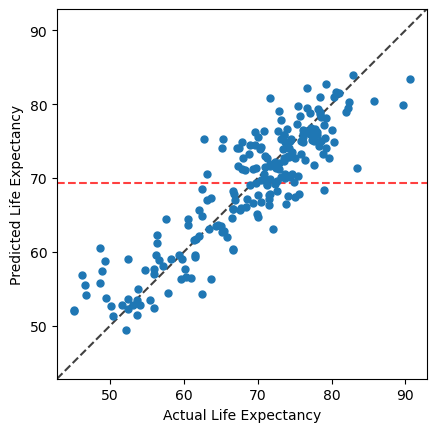

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]),
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.plot(lims, [np.mean(y_train),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

plt.show()

In [67]:
# SUMMARY AFTER MODEL EVALUATION :
# From the above analysis we found that the Polynomial regression shows better performance 
# compared to Linear Regression. 
# 
# The Degree  for the polynomial regression is  1.
# The feature scaling technique we used is - power transformer.
# MSE on Test dataset: 18.44 .
# R-squared Score on  Test dataset: 0.79 .

# LIMITATION: 

# From the above graph we conclude that the model has been able to reasonably predict the life expectancy 
# on unseen dataset but lacks precision in predicting individual data points accurately.

# Hence to overcome this we need to do data regularisation and hyperparameter tuning.

# Feature Importance

In [68]:
# Few Observations :
#      There might be collinearity in the dataset i.e few featues are highly correlated.
#      The plot show that 'AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female' are highly corelated.
#      Dropping the highly correlated features to reduce redundancy and then checking the performance of the model.


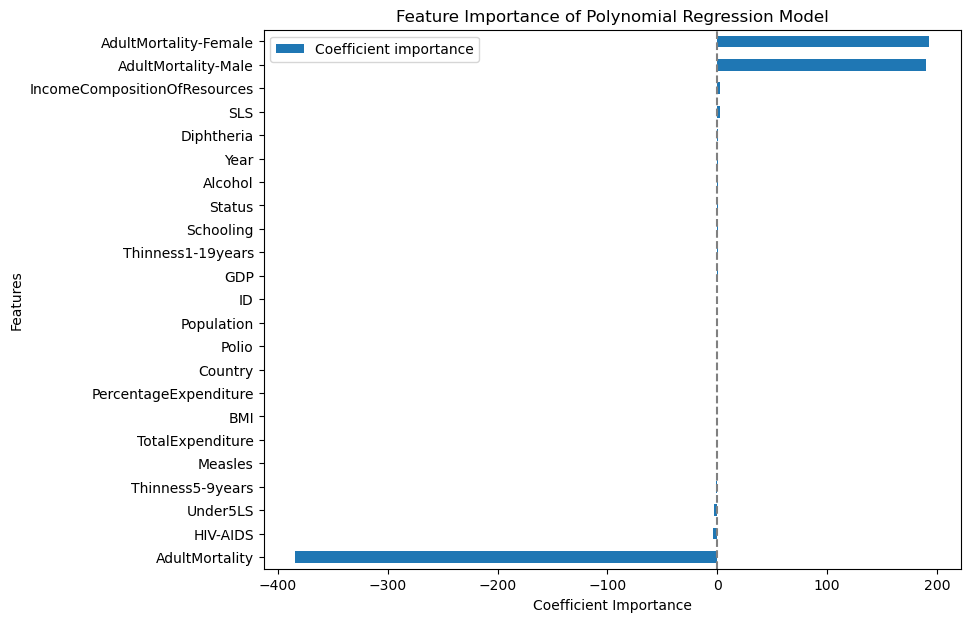

In [69]:
polynomial_regression_model.fit(X_train_power_transformed_scaled, y_train)

# Calculate coefficients importance
coefs = pd.DataFrame(
    polynomial_regression_model.coef_ * X_train_power_transformed_scaled.std(axis=0),
    columns=['Coefficient importance'],
    index=X_train.columns
)

# Sort coefficients by importance and plot
coefs.sort_values(by='Coefficient importance', ascending=True).plot(kind='barh', figsize=(9, 7))
plt.title('Feature Importance of Polynomial Regression Model')
plt.xlabel('Coefficient Importance')
plt.ylabel('Features')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()


In [70]:
print("Parameters of the Polynomial Regression model:")
for feature, coef in zip(X_train.columns, polynomial_regression_model.coef_):
    print(feature, ": ", coef)


Parameters of the Polynomial Regression model:
ID :  0.16392847374566882
Country :  -0.09331639232120326
Year :  0.5998590449107926
Status :  0.5472266576894831
AdultMortality :  -384.3018565070006
AdultMortality-Male :  190.22607070287478
AdultMortality-Female :  193.04446421899198
SLS :  2.0942877903467116
Alcohol :  0.5691421020167534
PercentageExpenditure :  -0.1214690226553423
Measles :  -0.2840301471177844
BMI :  -0.22750509910501363
Under5LS :  -2.703580641494952
Polio :  0.013113610600505317
TotalExpenditure :  -0.25456334992823154
Diphtheria :  1.0503295215025368
HIV-AIDS :  -3.5425195486755205
GDP :  0.3155335369162499
Population :  0.06769293914203488
Thinness1-19years :  0.3789752677926672
Thinness5-9years :  -1.122462966528536
IncomeCompositionOfResources :  2.099950501384874
Schooling :  0.3900140293764709


In [259]:
# Drop specified columns
new_data = data.drop(columns=['AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female'])
new_data.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,SLS,Alcohol,PercentageExpenditure,Measles,BMI,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,62,0.01,71.279624,1154,19.1,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,64,0.01,73.523582,492,18.6,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,66,0.01,73.219243,430,18.1,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,69,0.01,78.184215,2787,17.6,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,71,0.01,7.097109,3013,17.2,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [266]:
X = new_data.drop(columns=['TARGET_LifeExpectancy'])  
y = new_data['TARGET_LifeExpectancy'] 

# Splitting  data into 80% training & 20% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the temporary set into 50% validation & 50% test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Create polynomial features for TRAIN data
polynomial_features = PolynomialFeatures(degree=1)
X_train_polynomial = polynomial_features.fit_transform(X_train_power_transformed_scaled)

# Fit polynomial regression model on TRAIN data
polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(X_train_polynomial, y_train)

# Transform VALIDATION data using the same polynomial features
X_validation_polynomial = polynomial_features.transform(X_validation_power_transformed_scaled)

# Predict on the VALIDATION set
y_pred_validation = polynomial_regression_model.predict(X_validation_polynomial)

# Calculate the Mean Squared Error (MSE) and R2 score on the VALIDATION set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
r2_score_validation = r2_score(y_validation, y_pred_validation)

print("MSE on power transformed Validation Set:", mse_validation)
print("R2 Score on power transformed Validation Set:", r2_score_validation , "\n")

# Create polynomial features  for TEST Data
polynomial_features = PolynomialFeatures(degree=1)
X_test_polynomial = polynomial_features.fit_transform(X_test_power_transformed_scaled)

# Fit polynomial regression model
polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(X_test_polynomial, y_test)

# Predict on the test set
y_pred_test = polynomial_regression_model.predict(X_test_polynomial)

# Calculate the Mean Squared Error (MSE) and r2 score on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)

print("MSE on power transformed Test dataset:", mse_test)
print("R-squared Score on power transformed Test dataset:", r2_score_test)


MSE on power transformed Validation Set: 19.751916669493447
R2 Score on power transformed Validation Set: 0.747606740662811 

MSE on power transformed Test dataset: 19.57112274136291
R-squared Score on power transformed Test dataset: 0.774776837360036


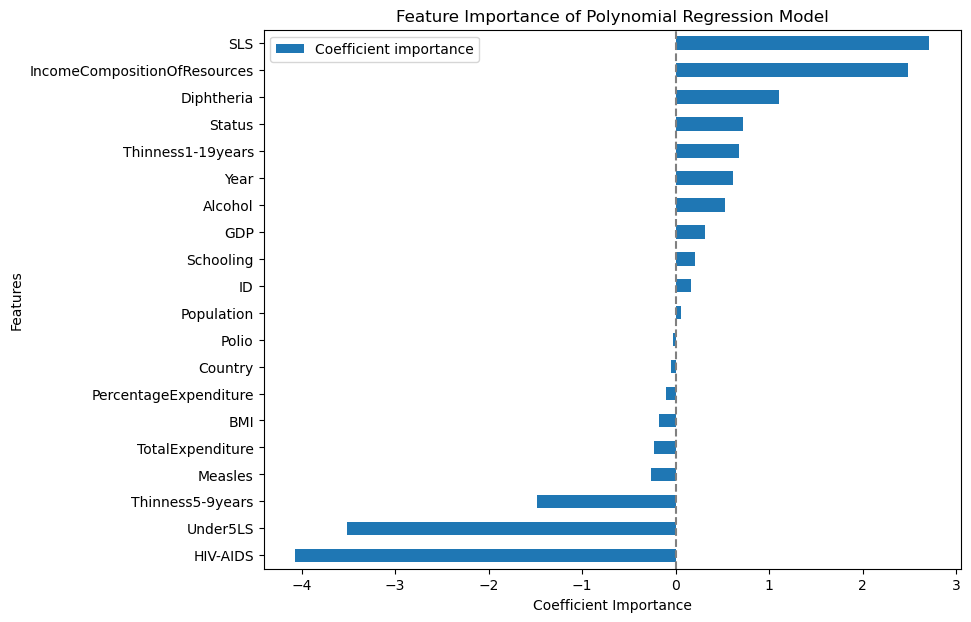

In [267]:
polynomial_regression_model.fit(X_train_power_transformed_scaled, y_train)

# Calculate coefficients importance
coefs = pd.DataFrame(
    polynomial_regression_model.coef_ * X_train_power_transformed_scaled.std(axis=0),
    columns=['Coefficient importance'],
    index=X_train.columns
)

# Sort coefficients by importance and plot
coefs.sort_values(by='Coefficient importance', ascending=True).plot(kind='barh', figsize=(9, 7))
plt.title('Feature Importance of Polynomial Regression Model')
plt.xlabel('Coefficient Importance')
plt.ylabel('Features')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

In [71]:
# SUMMARY :
#     Even after dropping the correlated fetures there isn't much significant change in the 
#     MSE  and R-squared Score which is  19.57 and  0.77 respectively.

# Thus trying out Regularisation Technique to increase the performance.

# Regularisation and Hyperparameter Tuning

In [72]:
# REGULARISATION
# We are doing regularisation to prevent overfitting and improve the model performance.
# This is achieved by adding a penalty tearm to the loss function during training.

# WE have used the following regression technique to see the perfomance
# 1. Lasso Regression - 
#             L1 regularization encourages sparsity in the model. 
#             Force the coefficients of less important features to zero.
#             Perform feature selection.
# 2. Ridge Regression  - 
#                 L2 regularization penalizes large coefficients towards zero. 
#                 Reduce multicollinearity. 
#                 Makes stable model.

# To achieve better performance we have done various trail and error by 
#         Changing the alpha score.
#         Changing the degree of the polynomial and checking the results etc.

In [73]:
# HYPERPARAMETER TUNING
# For this we have used both and tested which technique performs better
# 1. Grid Search - 
#         Searches through a specified grid of hyperparameters.
#         Best for small hyperparameter space.
#         Finds best hyperparameters within the specified grid.
# 2. Random search - 
#         Randomly samples hyperparameters from a specified distribution.
#         Performs better for large high dimensional hyper parameter space.

In [74]:
# degree= 1
degree = 2
# degree = 3
# degree = 4
# Create polynomial features
polynomial_features = PolynomialFeatures(degree=degree)
X_train_polynomial = polynomial_features.fit_transform(X_train_power_transformed_scaled)
X_validation_polynomial = polynomial_features.transform(X_validation_power_transformed_scaled)
X_test_polynomial = polynomial_features.transform(X_test_power_transformed_scaled)

In [75]:
# Lasso Regression with Random Search 
alpha_range = [0.1, 0.2, 0.5, 1.0]
param_grid = {'alpha': alpha_range}

random_search = RandomizedSearchCV(estimator=Lasso(), param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train_polynomial, y_train)

best_alpha = random_search.best_params_['alpha']
print("best_alpha : ", best_alpha)

lasso_regression_model = Lasso(alpha=best_alpha)
lasso_regression_model.fit(X_train_polynomial, y_train)

y_pred_validation_lasso = lasso_regression_model.predict(X_validation_polynomial)

mse_validation_lasso = mean_squared_error(y_validation, y_pred_validation_lasso)
r2_score_validation_lasso = r2_score(y_validation, y_pred_validation_lasso)

print("MSE on power transformed Validation dataset (Lasso with Random Search ):", mse_validation_lasso)
print("R-squared Score on power transformed Validation dataset (Lasso with Random Search ):", r2_score_validation_lasso)


/Users/shilpapatel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best_alpha :  0.1
MSE on power transformed Validation dataset (Lasso with Random Search ): 10.995105721888443
R-squared Score on power transformed Validation dataset (Lasso with Random Search ): 0.8595027198453865


In [76]:
# Lasso Regression with Grid Search
alpha_range = [0.1, 0.2, 0.5, 1.0]
param_grid = {'alpha': alpha_range}

grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_polynomial, y_train)

best_alpha = grid_search.best_params_['alpha']
print("best_alpha : ", best_alpha)

lasso_regression_model = Lasso(alpha=best_alpha)
lasso_regression_model.fit(X_train_polynomial, y_train)

y_pred_validation_lasso = lasso_regression_model.predict(X_validation_polynomial)

mse_validation_lasso = mean_squared_error(y_validation, y_pred_validation_lasso)
r2_score_validation_lasso = r2_score(y_validation, y_pred_validation_lasso)
print("MSE on power transformed Validation dataset (Lasso with Grid Search):", mse_validation_lasso)
print("R-squared Score on power transformed Validation dataset (Lasso with Grid Search):", r2_score_validation_lasso)

best_alpha :  0.1
MSE on power transformed Validation dataset (Lasso with Grid Search): 10.995105721888443
R-squared Score on power transformed Validation dataset (Lasso with Grid Search): 0.8595027198453865


In [77]:
# Ridge Regression with Grid Search

alpha_range = [0.1, 0.2, 0.5, 1.0]
param_grid = {'alpha': alpha_range}

grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_polynomial, y_train)

best_alpha = grid_search.best_params_['alpha']
print("best_alpha : ", best_alpha)

ridge_regression_model = Ridge(alpha=best_alpha)
ridge_regression_model.fit(X_train_polynomial, y_train)

y_pred_validation_ridge = ridge_regression_model.predict(X_validation_polynomial)

mse_validation_ridge = mean_squared_error(y_validation, y_pred_validation_ridge)
r2_score_validation_ridge = r2_score(y_validation, y_pred_validation_ridge)
print("MSE on power transformed Validation dataset (Ridge with Grid Search):", mse_validation_ridge)
print("R-squared Score on power transformed Validation dataset (Ridge with Grid Search):", r2_score_validation_ridge)

best_alpha :  1.0
MSE on power transformed Validation dataset (Ridge with Grid Search): 9.97303540314576
R-squared Score on power transformed Validation dataset (Ridge with Grid Search): 0.872562903489118


In [78]:
# Ridge Regression with Random Search

alpha_range = [0.1, 0.2, 0.5, 1.0]
param_grid = {'alpha': alpha_range}

random_search = RandomizedSearchCV(estimator=Ridge(), param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train_polynomial, y_train)

best_alpha = random_search.best_params_['alpha']
print("best_alpha : ", best_alpha)

ridge_regression_model = Ridge(alpha=best_alpha)
ridge_regression_model.fit(X_train_polynomial, y_train)

y_pred_validation_ridge = ridge_regression_model.predict(X_validation_polynomial)

mse_validation_ridge = mean_squared_error(y_validation, y_pred_validation_ridge)
r2_score_validation_ridge = r2_score(y_validation, y_pred_validation_ridge)
print("MSE on power transformed Validation dataset (Ridge):", mse_validation_ridge)
print("R-squared Score on power transformed Validation dataset (Ridge):", r2_score_validation_ridge)

best_alpha :  1.0
MSE on power transformed Validation dataset (Ridge): 9.97303540314576
R-squared Score on power transformed Validation dataset (Ridge): 0.872562903489118


/Users/shilpapatel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


### Model Evaluation on Test Data after Regularisation and Hyper Parameter tuning

In [79]:
# ridge regression and random search
y_pred_test_ridge = ridge_regression_model.predict(X_test_polynomial)

mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_score_test_ridge = r2_score(y_test, y_pred_test_ridge)
print("MSE on power transformed Test dataset (Ridge):", mse_test_ridge)
print("R-squared Score on power transformed Test dataset (Ridge):", r2_score_test_ridge)


MSE on power transformed Test dataset (Ridge): 11.98636716018408
R-squared Score on power transformed Test dataset (Ridge): 0.8620616938508626


# Overall Summary

In [80]:
# After implementing data augmentation and hyperparameter tuning,
# we observed a notable improvement in both accuracy and mean squared error (MSE).
# Consequently, we opted for a polynomial regression approach with a train-test split percentage of 80-10-10, 
# a polynomial degree of 2, and an alpha value of 1.0. For hyperparameter tuning, we employed random search, 
# leveraging ridge regression as our regularization technique, and utilized power transformer for feature scaling. 

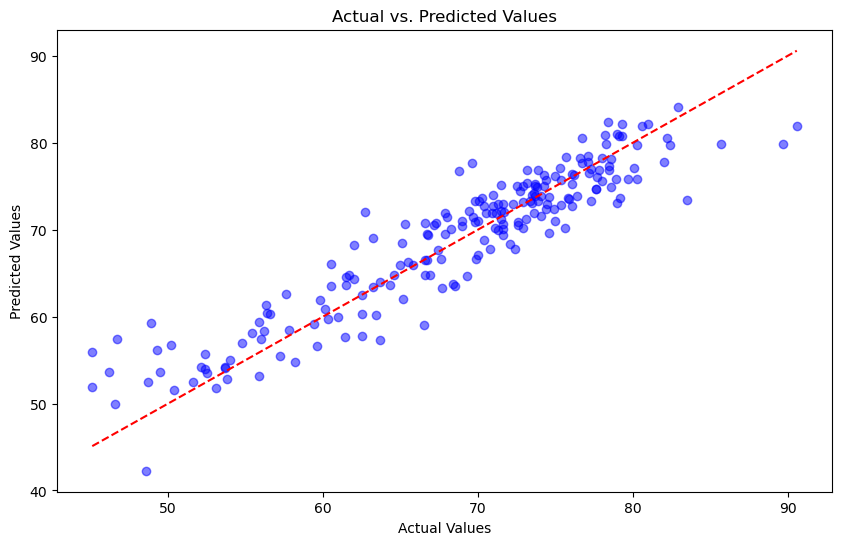

Correlation Coefficient: 0.9298814458916362


In [81]:
#Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_ridge, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

correlation_coefficient = np.corrcoef(y_test, y_pred_test_ridge)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)


In [82]:
# From the residual we can see that the actual and the predicted values are highly corelated
# A correlation coefficient of 0.929 indicates a strong positive linear relationship between
# the predicted values and the actual values.


# Extracting Predictions and IDs to csv File

In [83]:
y_pred_test_ridge.shape

(208,)

In [84]:
test_data = pd.read_csv("test.csv")
test_data.head()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


In [85]:
IDs = test_data['ID']

In [86]:
test_scaled = pt.transform(test_data) 
X_test_polynomial = polynomial_features.transform(test_scaled)

# Predicting using the trained model
y_pred_test_ridge = ridge_regression_model.predict(X_test_polynomial)
y_pred_test_rounded = np.round(y_pred_test_ridge, decimals=1)

# Creating the dataframe
result_df = pd.DataFrame({'ID': IDs, 'TARGET_LifeExpectancy': y_pred_test_rounded})

# Saving the DataFrame to csv file
result_df.to_csv('s3858297.csv', index=False)


In [87]:
# Strengths:

# High Correlation Coefficient between the predicted and actual values indicating 
# that the model captures a significant portion of the variance in the target variable.

# Low Mean Squared Error (MSE)implying that the model's predictions are close to the actual values hence 
# its performace is accurate and reliable. 

# The model uses a simple and interpretable algorithm enhancing the model's transparency and trustworthiness.

# Limitation :
# Polynomial Regression become sensitive to outliers at high degree.
# Sometimes Polynomial Regression struggle to accurately predict values outside the range of the training data.

# Recommendation :
# Feature Engineering to capture nonlinear relationships between the features and the target variable more effectively.
# Evaluating alternative algorithms (e.g., decision trees, random forests, or gradient boosting) 
# to capture nonlinear relationships in the data.
